# Assignment Overview


61378 - Simon Eschholz

## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.


##### 1. Metrics and Techniques
I used a lot of descriptives analysis techniques utilizing pandas .describe(), .info(), .value_counts() to assess the datasets. 
Accuracy: Checking if ranges fall into an acceptable range (i.e. dates not in the future, annual amounts paid for insurance, home market value

Completeness: Assessing the percentage of non-null values in each column or row.

Consistency: 2.020228% missing values in the CUST_START_DATE column.

Timeliness:

Validity:


-> analysing outlier, frequency, 

CUST START DATE NEEDS TO BE AFTER CUST ORIGINAL DATE

Handling of large numbers of same birth dates


 

##### 2. Issues with datasets 


##### 3. After cleaning the data improve 

In [698]:
# Loading libraries

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
sns.set(style="whitegrid")

rcParams['figure.figsize'] = (12, 6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [699]:
def missing_pct(df):
    # Calculate percentage of missing for each column
    s_missing = df.isnull().sum() * 100 / df.shape[0]
    # Convert the series back to data frame
    df_missing = pd.DataFrame(s_missing).round(2)
    # Reset and rename the index
    df_missing = df_missing.reset_index().rename(
        columns={
            'index':'Column',
            0:'Missing_Percentage (%)'
        }
    )
    # Sort the data frame
    df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    return df_missing

In [700]:
# Loading datasets
customer_df = pd.read_csv("ABC_df_customer.csv")

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/1552610.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv("ABC_df_customer.csv")


In [701]:
demographics_df = pd.read_csv("ABC_df_demographic.csv")

In [702]:
termination_df = pd.read_csv("ABC_df_termination.csv")

#### Customer DF Short Statistics

In [703]:
# customer_df short stats
customer_df.drop(columns='Unnamed: 0', inplace=True)

In [704]:
customer_df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366


In [705]:
customer_df.shape

(2303124, 9)

In [706]:
missing_pct(customer_df)

,Column,Missing_Percentage (%)
5,CUST_START_DATE,3.96
0,INDIVIDUAL_ID,0.00
1,ADDRESS_ID,0.00
2,CUST_ORIG_DATE,0.00
3,DATE_OF_BIRTH,0.00
4,SOCIAL_SECURITY_NUMBER,0.00
6,CURR_ANN_AMT_CAR,0.00
7,CURR_ANN_AMT_HEALTH,0.00
8,CURR_ANN_AMT_HOUSE,0.00


In [707]:
customer_df.describe()

,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
count,2.303123e+06,2.303123e+06,2.303124e+06,2.303124e+06,2.303124e+06
mean,2.213018e+11,5.213007e+11,1.431069e+03,5.725299e+02,4.293221e+02
std,9.915268e+05,4.170653e+05,2.439311e+02,1.896686e+02,7.606463e+01
min,2.213000e+11,5.213000e+11,2.869633e+02,-3.516244e+02,9.000000e+01
25%,2.213009e+11,5.213003e+11,1.264830e+03,4.442061e+02,3.770000e+02
50%,2.213018e+11,5.213007e+11,1.425758e+03,5.720247e+02,4.270000e+02
75%,2.213027e+11,5.213010e+11,1.591793e+03,7.001292e+02,4.790000e+02
max,2.213033e+11,5.213015e+11,2.769374e+03,1.617531e+03,8.870000e+02


#### Step 1: Identify and remove duplicates

###### customer_df

In [708]:
customer_df_step1 = customer_df

In [709]:
customer_df_step1 = customer_df_step1.drop_duplicates(subset="INDIVIDUAL_ID", keep=False)

In [710]:
customer_df_step1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257518 entries, 0 to 2280320
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           2257517 non-null  float64
 1   ADDRESS_ID              2257517 non-null  float64
 2   CUST_ORIG_DATE          2257518 non-null  object 
 3   DATE_OF_BIRTH           2257518 non-null  object 
 4   SOCIAL_SECURITY_NUMBER  2257518 non-null  object 
 5   CUST_START_DATE         2211911 non-null  object 
 6   CURR_ANN_AMT_CAR        2257518 non-null  float64
 7   CURR_ANN_AMT_HEALTH     2257518 non-null  float64
 8   CURR_ANN_AMT_HOUSE      2257518 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 172.2+ MB


In [711]:
customer_df_step1.duplicated().sum()

0

In [712]:
customer_df_step1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257518 entries, 0 to 2280320
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           2257517 non-null  float64
 1   ADDRESS_ID              2257517 non-null  float64
 2   CUST_ORIG_DATE          2257518 non-null  object 
 3   DATE_OF_BIRTH           2257518 non-null  object 
 4   SOCIAL_SECURITY_NUMBER  2257518 non-null  object 
 5   CUST_START_DATE         2211911 non-null  object 
 6   CURR_ANN_AMT_CAR        2257518 non-null  float64
 7   CURR_ANN_AMT_HEALTH     2257518 non-null  float64
 8   CURR_ANN_AMT_HOUSE      2257518 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 172.2+ MB


###### demographics_df

In [713]:
demographics_df_step1 = demographics_df.drop(columns='Unnamed: 0')

In [714]:
demographics_df_step1.shape

(2112579, 10)

In [715]:
# Format into datetime object
customer_df_step1['CUST_ORIG_DATE'] = pd.to_datetime(customer_df_step1['CUST_ORIG_DATE'])
customer_df_step1['CUST_START_DATE'] = pd.to_datetime(customer_df_step1['CUST_START_DATE'])
customer_df_step1['DATE_OF_BIRTH'] = pd.to_datetime(customer_df_step1['DATE_OF_BIRTH'])

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/4087171517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_step1['CUST_ORIG_DATE'] = pd.to_datetime(customer_df_step1['CUST_ORIG_DATE'])
/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/4087171517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_step1['CUST_START_DATE'] = pd.to_datetime(customer_df_step1['CUST_START_DATE'])
/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/408717151

##### terminated_df

In [716]:
termination_df_step1 = termination_df

In [717]:
termination_df_step1.head()

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
0,0,2.213026e+11,2022-10-09
1,1,2.213028e+11,2022-04-24
2,2,2.213027e+11,2022-05-21
3,3,2.213002e+11,2022-04-27
4,4,2.213026e+11,2022-09-16


In [718]:
termination_df_step1['SUSPD_DATE'] = pd.to_datetime(termination_df_step1['SUSPD_DATE'])

In [719]:
termination_df_step1.describe()

,Unnamed: 0,INDIVIDUAL_ID
count,269259.000000,2.692590e+05
mean,134629.000000,2.213018e+11
std,77728.522403,9.890987e+05
min,0.000000,2.213000e+11
25%,67314.500000,2.213009e+11
50%,134629.000000,2.213018e+11
75%,201943.500000,2.213027e+11
max,269258.000000,2.213033e+11


In [720]:
termination_df_step1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269259 entries, 0 to 269258
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     269259 non-null  int64         
 1   INDIVIDUAL_ID  269259 non-null  float64       
 2   SUSPD_DATE     266566 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 6.2 MB


In [721]:
# Dropping duplicates in the ID column, if there exist any
termination_df_step1 = termination_df_step1.drop_duplicates(subset="INDIVIDUAL_ID",keep=False)

In [740]:
termination_df_step1.drop(columns='Unnamed: 0', inplace=True)

In [741]:
termination_df_step1.head()

,INDIVIDUAL_ID,SUSPD_DATE
0,2.213026e+11,2022-10-09
1,2.213028e+11,2022-04-24
2,2.213027e+11,2022-05-21
3,2.213002e+11,2022-04-27
4,2.213026e+11,2022-09-16


#### Step 2:  Identify and deal with missing values in the data


##### customer_df

In [723]:
missing_pct(customer_df_step1)

,Column,Missing_Percentage (%)
5,CUST_START_DATE,2.02
0,INDIVIDUAL_ID,0.00
1,ADDRESS_ID,0.00
2,CUST_ORIG_DATE,0.00
3,DATE_OF_BIRTH,0.00
4,SOCIAL_SECURITY_NUMBER,0.00
6,CURR_ANN_AMT_CAR,0.00
7,CURR_ANN_AMT_HEALTH,0.00
8,CURR_ANN_AMT_HOUSE,0.00


CUST_START_DATE has 2,02 % missing values, can be filled with origin date

In [724]:
customer_df_step2 = customer_df_step1

In [725]:
customer_df_step2['CUST_START_DATE'].fillna(customer_df_step2['CUST_ORIG_DATE'], inplace=True)

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/24974884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_step2['CUST_START_DATE'].fillna(customer_df_step2['CUST_ORIG_DATE'], inplace=True)


In [726]:
missing_pct(customer_df_step2)

,Column,Missing_Percentage (%)
0,INDIVIDUAL_ID,0.0
1,ADDRESS_ID,0.0
2,CUST_ORIG_DATE,0.0
3,DATE_OF_BIRTH,0.0
4,SOCIAL_SECURITY_NUMBER,0.0
5,CUST_START_DATE,0.0
6,CURR_ANN_AMT_CAR,0.0
7,CURR_ANN_AMT_HEALTH,0.0
8,CURR_ANN_AMT_HOUSE,0.0


customer_df missing values cleaned

In [727]:
customer_df_step2.describe()

,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
count,2.257517e+06,2.257517e+06,2.257518e+06,2.257518e+06,2.257518e+06
mean,2.213018e+11,5.213007e+11,1.431062e+03,5.725250e+02,4.293214e+02
std,9.915715e+05,4.171218e+05,2.439508e+02,1.896649e+02,7.607093e+01
min,2.213000e+11,5.213000e+11,2.869633e+02,-3.516244e+02,9.000000e+01
25%,2.213009e+11,5.213003e+11,1.264777e+03,4.441961e+02,3.770000e+02
50%,2.213018e+11,5.213007e+11,1.425739e+03,5.720113e+02,4.270000e+02
75%,2.213027e+11,5.213010e+11,1.591797e+03,7.001139e+02,4.790000e+02
max,2.213033e+11,5.213015e+11,2.769374e+03,1.617531e+03,8.870000e+02


##### demographics_df

In [728]:
demographics_df_step2 = demographics_df_step1

In [729]:
missing_pct(demographics_df_step1)

,Column,Missing_Percentage (%)
4,MARITAL_STATUS,20.43
5,HOME_MARKET_VALUE,9.00
0,INDIVIDUAL_ID,0.00
1,INCOME,0.00
2,HAS_CHILDREN,0.00
3,LENGTH_OF_RESIDENCE,0.00
6,HOME_OWNER,0.00
7,COLLEGE_DEGREE,0.00
8,GOOD_CREDIT,0.00
9,ADVANCED_STUDIES,0.00


Maritial status has 20.45% of missing values. 
Create dummy variable out of Maritial Status column.

In [730]:
demographics_df_step2 = pd.get_dummies(demographics_df_step1, columns=["MARITAL_STATUS"])

In [731]:
missing_pct(demographics_df_step2)

,Column,Missing_Percentage (%)
4,HOME_MARKET_VALUE,9.0
0,INDIVIDUAL_ID,0.0
1,INCOME,0.0
2,HAS_CHILDREN,0.0
3,LENGTH_OF_RESIDENCE,0.0
5,HOME_OWNER,0.0
6,COLLEGE_DEGREE,0.0
7,GOOD_CREDIT,0.0
8,ADVANCED_STUDIES,0.0
9,MARITAL_STATUS_Married,0.0


Investigate Home Market Values

In [732]:
demographics_df_step2[pd.isnull(demographics_df_step2['HOME_MARKET_VALUE'])]

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single
1,2.213032e+11,63750.000,0.0,0.0,NaN,0,0,0,N,0,1
4,2.213032e+11,187500.000,0.0,0.0,NaN,0,0,1,Y,0,0
16,2.213015e+11,105000.000,0.0,0.0,NaN,0,0,1,N,0,0
22,2.213008e+11,71250.000,0.0,0.0,NaN,0,0,1,N,0,0
28,2.213017e+11,41250.000,0.0,0.0,NaN,0,0,1,N,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2112516,2.213009e+11,131250.000,1.0,0.0,NaN,0,0,1,Y,1,0
2112542,2.213017e+11,120558.264,0.0,0.0,NaN,0,1,1,N,0,0
2112548,2.213025e+11,131250.000,0.0,0.0,NaN,0,0,0,Y,0,0
2112556,2.213032e+11,48750.000,1.0,0.0,NaN,0,0,1,N,0,1


Home Market Value is 0 when customer does not have a home. Fill NaN's with Zeros.

In [733]:
#demographics_df_step2 = pd.get_dummies(demographics_df_step2, columns=["HOME_MARKET_VALUE"], dummy_na= True)

In [734]:
demographics_df_step2["HOME_MARKET_VALUE"] = demographics_df_step2["HOME_MARKET_VALUE"].fillna(0)

In [735]:
missing_pct(demographics_df_step2)

,Column,Missing_Percentage (%)
0,INDIVIDUAL_ID,0.0
1,INCOME,0.0
2,HAS_CHILDREN,0.0
3,LENGTH_OF_RESIDENCE,0.0
4,HOME_MARKET_VALUE,0.0
5,HOME_OWNER,0.0
6,COLLEGE_DEGREE,0.0
7,GOOD_CREDIT,0.0
8,ADVANCED_STUDIES,0.0
9,MARITAL_STATUS_Married,0.0


Demographics Dataset cleaned

In [736]:
demographics_df_step2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           2112579 non-null  float64
 1   INCOME                  2112579 non-null  float64
 2   HAS_CHILDREN            2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE     2112579 non-null  float64
 4   HOME_MARKET_VALUE       2112579 non-null  object 
 5   HOME_OWNER              2112579 non-null  int64  
 6   COLLEGE_DEGREE          2112579 non-null  int64  
 7   GOOD_CREDIT             2112579 non-null  int64  
 8   ADVANCED_STUDIES        2112579 non-null  object 
 9   MARITAL_STATUS_Married  2112579 non-null  uint8  
 10  MARITAL_STATUS_Single   2112579 non-null  uint8  
dtypes: float64(4), int64(3), object(2), uint8(2)
memory usage: 149.1+ MB


##### terminated_df

In [742]:
termination_df_step2 = termination_df_step1

In [743]:
missing_pct(termination_df_step1)

,Column,Missing_Percentage (%)
1,SUSPD_DATE,1.0
0,INDIVIDUAL_ID,0.0


Remove 1% of supd date values

In [744]:
# Drop missing values (low amount of missing values, so can be dropped)
termination_df_step2 = termination_df_step2.dropna()

In [745]:
missing_pct(termination_df_step2)

,Column,Missing_Percentage (%)
0,INDIVIDUAL_ID,0.0
1,SUSPD_DATE,0.0


#### Step 3: Address outliers by either removing or transforming them

##### customer_df

In [766]:
customer_df_step3 = customer_df_step2

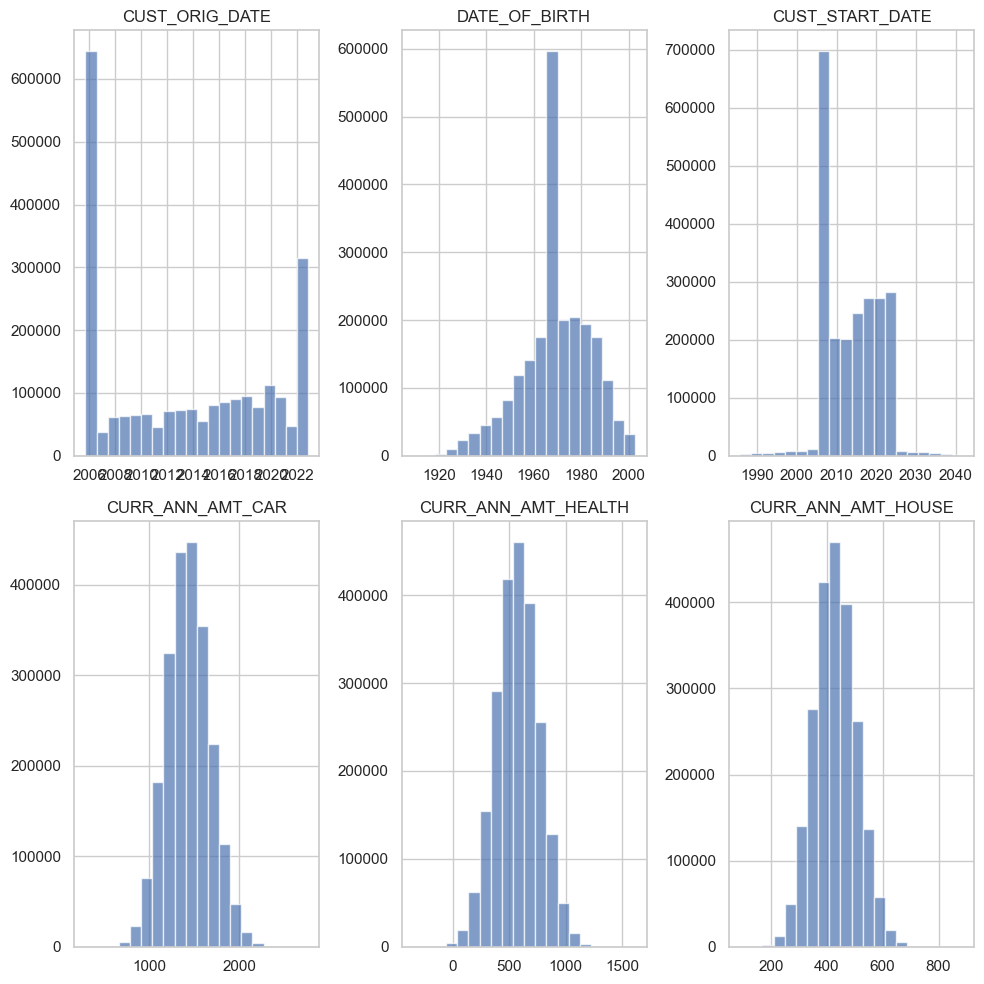

In [767]:
# Select columns you want to plot
columns_to_plot = ['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE' ]

# Determine number of rows/columns for the subplot grid
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten() if n_rows > 1 else [axs]

# Plot histograms for selected columns
for ax, column in zip(axs, columns_to_plot):
    ax.hist(customer_df_step2[column], bins=20, alpha=0.7)
    ax.set_title(column)

# Hide any unused subplot areas
for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

Remove outliers for the dates

In [ ]:
#sns.pairplot(customer_df)

Based on this graphic: Remove outliers in Original, Start & Birth Dates

In [768]:
customer_df_step3['CUST_START_DATE'].value_counts()

2005-09-11    547197
2022-09-13     40683
2019-08-16     39686
2022-06-24     21241
2014-02-15     20456
               ...  
2033-01-28         1
1997-01-12         1
1997-01-18         1
2034-12-17         1
2029-01-22         1
Name: CUST_START_DATE, Length: 18275, dtype: int64

In [770]:
# removing outliers
customer_df_step3 = customer_df_step3[customer_df_step3['CUST_START_DATE'] != "2005-09-11"]

In [771]:
customer_df_step3 = customer_df_step3[customer_df_step3['CUST_ORIG_DATE'] != "2005-09-11"]
#customer_df_step3 = customer_df_step3[customer_df_step3['CUST_ORIG_DATE'] != "2005-09-11"]

In [772]:
customer_df_step3 = customer_df_step3[customer_df_step3['DATE_OF_BIRTH'] != "1967-07-07"]

In [773]:
customer_df_step3['CUST_START_DATE'].value_counts()

2022-09-13    3716
2019-08-16    3268
2022-06-24    2725
2022-07-29    1840
2022-08-02    1824
              ... 
2038-03-04       1
1992-03-18       1
1991-07-13       1
2038-05-03       1
2029-01-22       1
Name: CUST_START_DATE, Length: 18269, dtype: int64

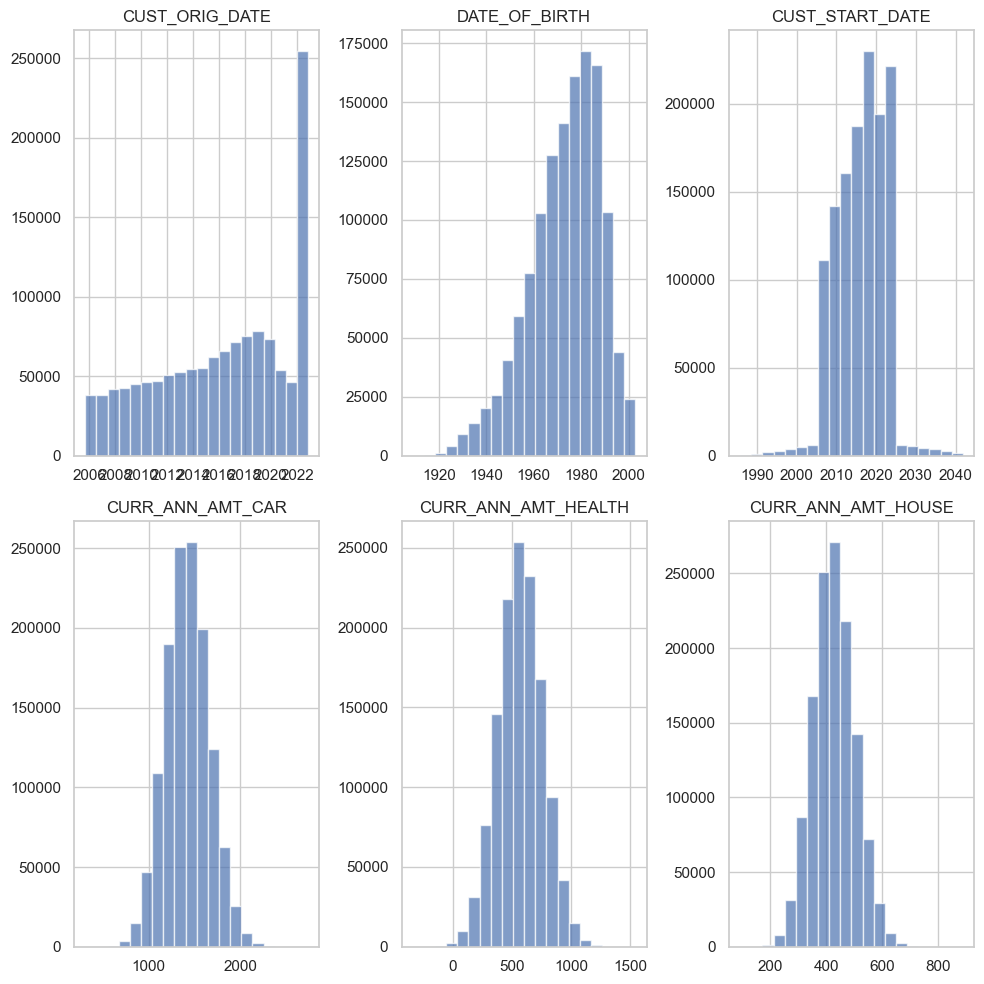

In [774]:
# Select columns you want to plot
columns_to_plot = ['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE' ]

# Determine number of rows/columns for the subplot grid
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten() if n_rows > 1 else [axs]

# Plot histograms for selected columns
for ax, column in zip(axs, columns_to_plot):
    ax.hist(customer_df_step3[column], bins=20, alpha=0.7)
    ax.set_title(column)

# Hide any unused subplot areas
for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [785]:
#customer_df_step3_test = customer_df_step3

Removing outlier by the Inter Quartile range

In [797]:
outlier_df = customer_df_step3

In [798]:
# Identify and remove outliers in "CURR_ANN_AMT_CAR" column.
Q1 = outlier_df['CURR_ANN_AMT_CAR'].quantile(0.25)
Q3 = outlier_df['CURR_ANN_AMT_CAR'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers using the interquartile range (IQR) method
outlier_df = outlier_df[(outlier_df['CURR_ANN_AMT_CAR'] >= Q1 - 1.5 * IQR) & (outlier_df['CURR_ANN_AMT_CAR'] <= Q3 + 1.5 * IQR)]

In [799]:
# Identify and remove outliers in "CURR_ANN_AMT_HOUSE" column.
Q1 = outlier_df['CURR_ANN_AMT_HOUSE'].quantile(0.25)
Q3 = outlier_df['CURR_ANN_AMT_HOUSE'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers using the interquartile range (IQR) method
outlier_df = outlier_df[(outlier_df['CURR_ANN_AMT_HOUSE'] >= Q1 - 1.5 * IQR) & (outlier_df['CURR_ANN_AMT_HOUSE'] <= Q3 + 1.5 * IQR)]

In [800]:
# Identify and remove outliers in "CURR_ANN_AMT_HEALTH" column.
Q1 = outlier_df['CURR_ANN_AMT_HEALTH'].quantile(0.25)
Q3 = outlier_df['CURR_ANN_AMT_HEALTH'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers using the interquartile range (IQR) method
outlier_df = outlier_df[(outlier_df['CURR_ANN_AMT_HEALTH'] >= Q1 - 1.5 * IQR) & (outlier_df['CURR_ANN_AMT_HEALTH'] <= Q3 + 1.5 * IQR)]

In [805]:
customer_df_step3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293569 entries, 0 to 2280320
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   INDIVIDUAL_ID           1293568 non-null  float64       
 1   ADDRESS_ID              1293568 non-null  float64       
 2   CUST_ORIG_DATE          1293569 non-null  datetime64[ns]
 3   DATE_OF_BIRTH           1293569 non-null  datetime64[ns]
 4   SOCIAL_SECURITY_NUMBER  1293569 non-null  object        
 5   CUST_START_DATE         1293569 non-null  datetime64[ns]
 6   CURR_ANN_AMT_CAR        1293569 non-null  float64       
 7   CURR_ANN_AMT_HEALTH     1293569 non-null  float64       
 8   CURR_ANN_AMT_HOUSE      1293569 non-null  int64         
dtypes: datetime64[ns](3), float64(4), int64(1), object(1)
memory usage: 98.7+ MB


##### demographics_df

In [ ]:
demographics_df_step3 = demographics_df_step2

In [807]:
demographics_df_step3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           2112579 non-null  float64
 1   INCOME                  2112579 non-null  float64
 2   HAS_CHILDREN            2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE     2112579 non-null  float64
 4   HOME_MARKET_VALUE       2112579 non-null  object 
 5   HOME_OWNER              2112579 non-null  int64  
 6   COLLEGE_DEGREE          2112579 non-null  int64  
 7   GOOD_CREDIT             2112579 non-null  int64  
 8   ADVANCED_STUDIES        2112579 non-null  object 
 9   MARITAL_STATUS_Married  2112579 non-null  uint8  
 10  MARITAL_STATUS_Single   2112579 non-null  uint8  
dtypes: float64(4), int64(3), object(2), uint8(2)
memory usage: 149.1+ MB


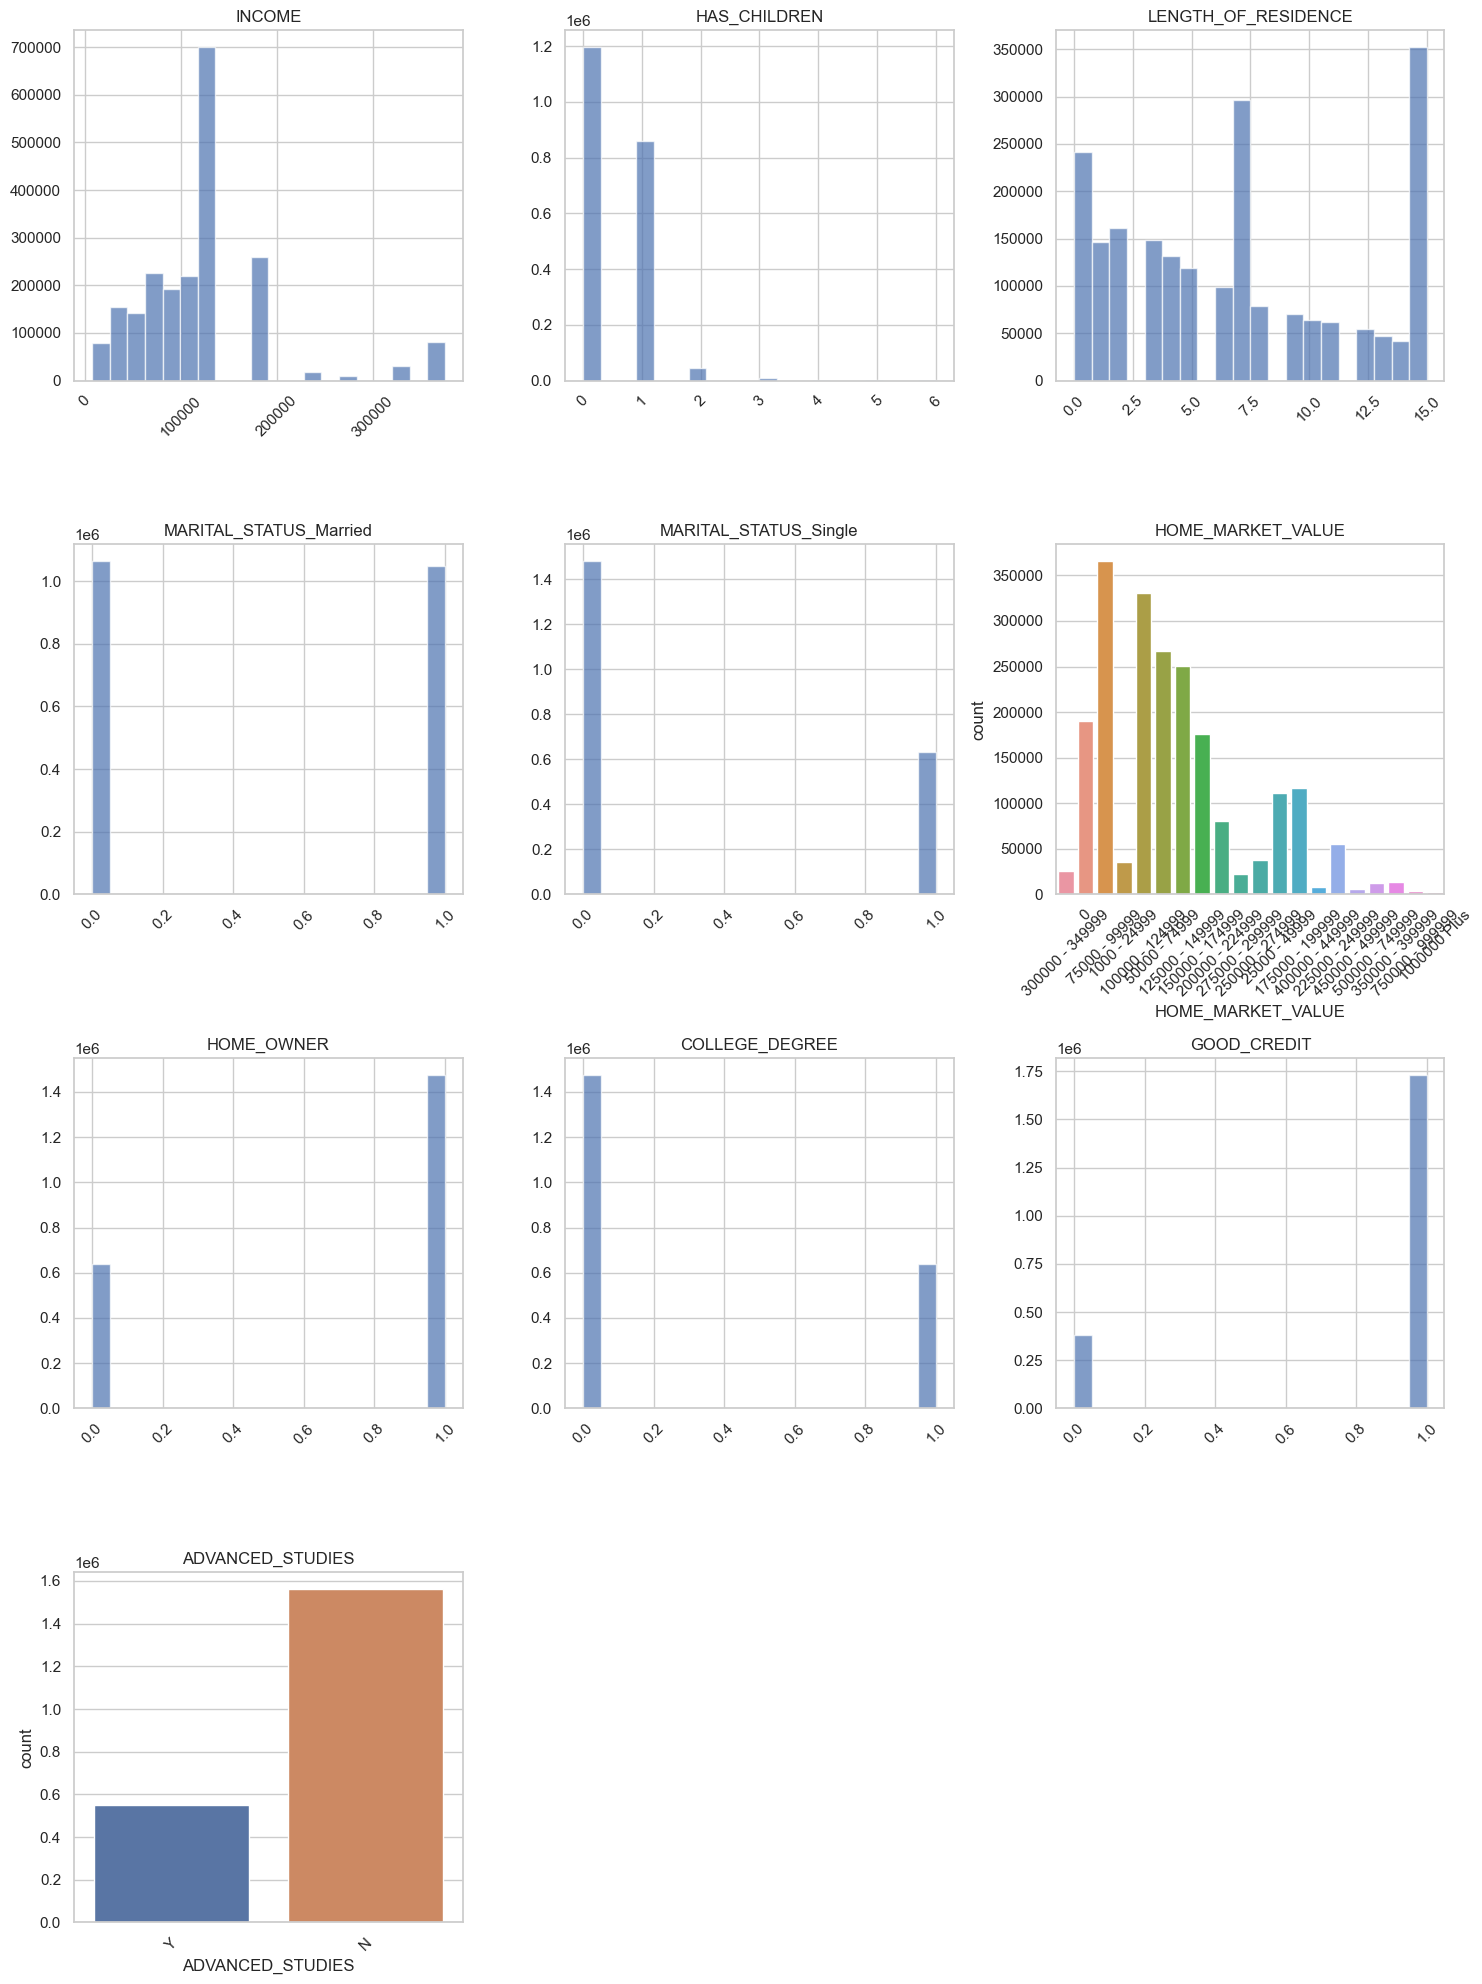

In [813]:
columns_to_plot = ['INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single' ,  'HOME_MARKET_VALUE', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES']

# Determine number of rows/columns for the subplot grid
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Iterate over each column and plot accordingly
for i, column in enumerate(columns_to_plot):
    # Check if the column is numeric or categorical
    if demographics_df_step3[column].dtype == 'object' or demographics_df_step3[column].dtype.name == 'category':
        # For categorical data, use count plot
        sns.countplot(data=demographics_df_step3, x=column, ax=axs[i])
    else:
        # For numeric data, use histogram
        axs[i].hist(demographics_df_step3[column], bins=20, alpha=0.7)
    axs[i].set_title(column)
    axs[i].tick_params(axis='x', rotation=45)

# Hide any unused subplot areas
for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [809]:
#sns.pairplot(demographics_df)

Error in callback <function flush_figures at 0x7ff1eedf1ea0> (for post_execute):



KeyboardInterrupt



Column 'Has children' has values above 2. These should be removed to give the column the relevant meaning and remove outliers or wrong input data.

In [817]:
demographics_df_step3['HAS_CHILDREN'] = demographics_df_step3['HAS_CHILDREN'] <= 1

In [818]:
demographics_df_step3['HAS_CHILDREN'].value_counts()

True     2055517
False      57062
Name: HAS_CHILDREN, dtype: int64

In [811]:
demographics_df_step3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           2112579 non-null  float64
 1   INCOME                  2112579 non-null  float64
 2   HAS_CHILDREN            2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE     2112579 non-null  float64
 4   HOME_MARKET_VALUE       2112579 non-null  object 
 5   HOME_OWNER              2112579 non-null  int64  
 6   COLLEGE_DEGREE          2112579 non-null  int64  
 7   GOOD_CREDIT             2112579 non-null  int64  
 8   ADVANCED_STUDIES        2112579 non-null  object 
 9   MARITAL_STATUS_Married  2112579 non-null  uint8  
 10  MARITAL_STATUS_Single   2112579 non-null  uint8  
dtypes: float64(4), int64(3), object(2), uint8(2)
memory usage: 149.1+ MB


##### termination_df

In [820]:
termination_df_step3 = termination_df_step2

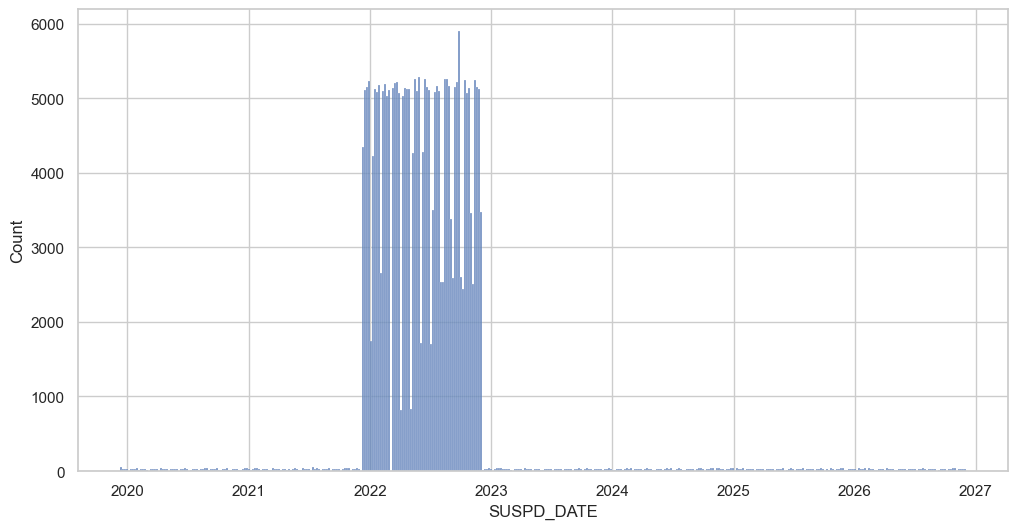

In [821]:
sns.histplot(termination_df_step2['SUSPD_DATE'])
plt.show()

In [ ]:
termination_df_step2['SUSPD_DATE'].value_counts()

#### Step 4: Remove or correct irrelevant data

##### customer_df

In [822]:
customer_df_step4 = customer_df_step3

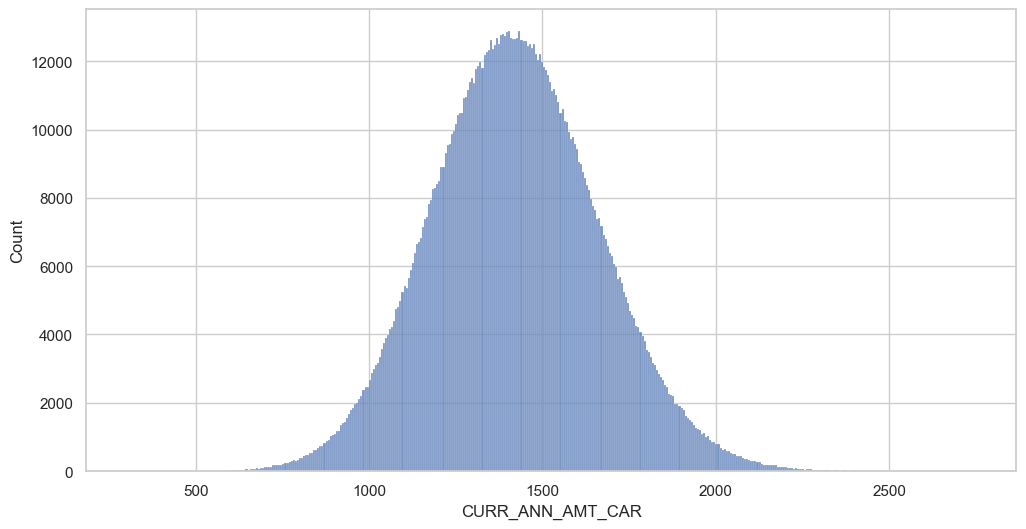

In [1318]:
sns.histplot(customer_df_step4["CURR_ANN_AMT_CAR"])
plt.show()

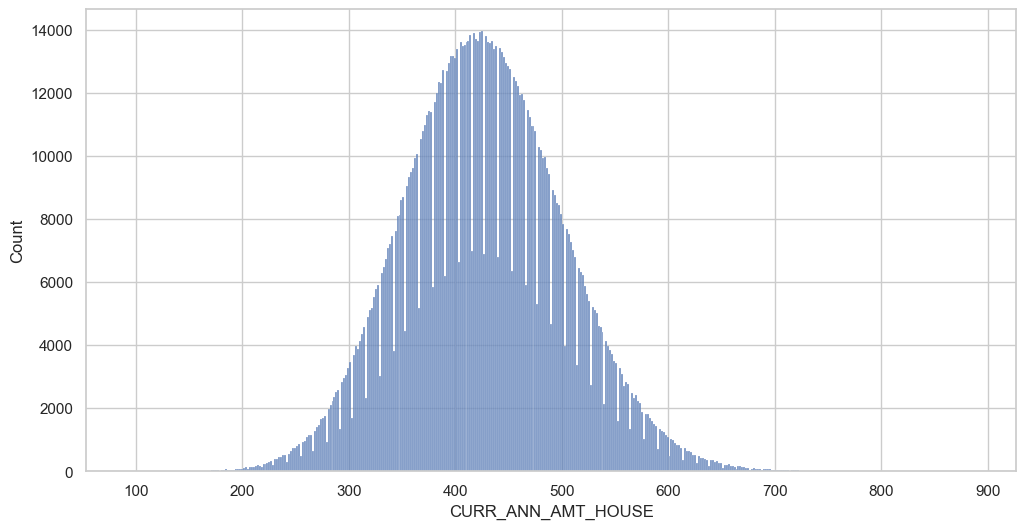

In [1319]:
sns.histplot(customer_df_step4["CURR_ANN_AMT_HOUSE"])
plt.show()

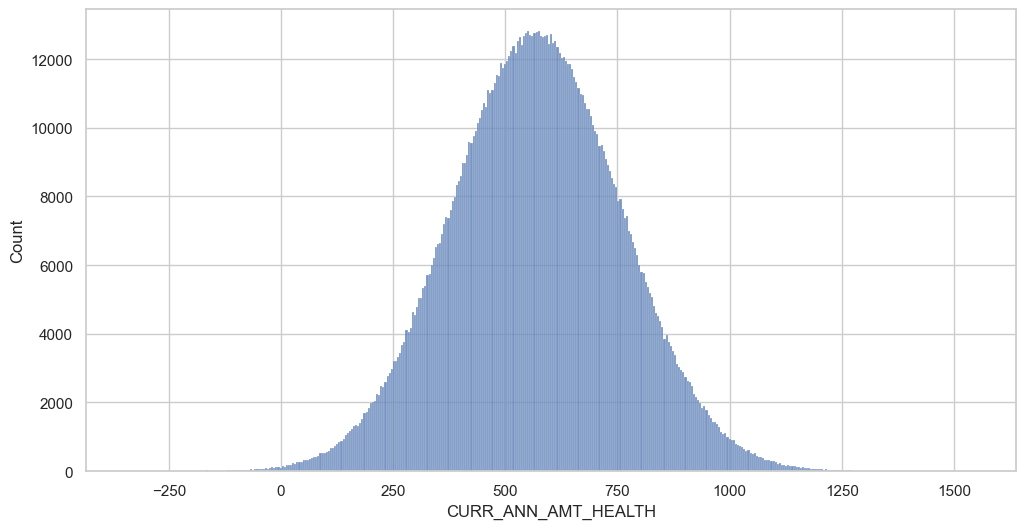

In [1320]:
sns.histplot(customer_df_step4["CURR_ANN_AMT_HEALTH"])
plt.show()

##### demographcis_df

In [823]:
demographics_df_step4 = demographics_df_step3

##### termination_df

In [824]:
termination_df_step4 = termination_df_step3

#### Step 5: Detect and deal with any invalid or inconsistent data

Remove birth dates

remove length residens

##### customer_df

###### Annual amounts paid values above zero

In [825]:
customer_df_step5 = customer_df_step4

In [826]:
# Insurance amount needs to be above zero
customer_df_step5 = customer_df_step5[customer_df_step5['CURR_ANN_AMT_HEALTH'] > 0 ]
customer_df_step5 = customer_df_step5[customer_df_step5['CURR_ANN_AMT_CAR'] > 0 ]
customer_df_step5 = customer_df_step5[customer_df_step5['CURR_ANN_AMT_HOUSE'] > 0 ]

###### start date after original join date

In [827]:
# Policy start date has to be dated after the customer joined as a customer
customer_df_step5 = customer_df_step5[customer_df_step5["CUST_START_DATE"] >= customer_df_step5["CUST_ORIG_DATE"]]

In [828]:
# Policy start date has to be lower than year after the last customer joined as a customer
customer_df_step5 = customer_df_step5[customer_df_step5['CUST_START_DATE'] <= "2023-11-12"]

In [829]:
customer_df_step5['CUST_ORIG_DATE'].value_counts()

2022-09-13    3717
2019-08-16    3284
2022-06-24    2725
2022-07-29    1838
2022-08-02    1816
              ... 
2008-08-10       1
2015-04-01       1
2009-08-05       1
2013-11-14       1
2014-01-22       1
Name: CUST_ORIG_DATE, Length: 5250, dtype: int64

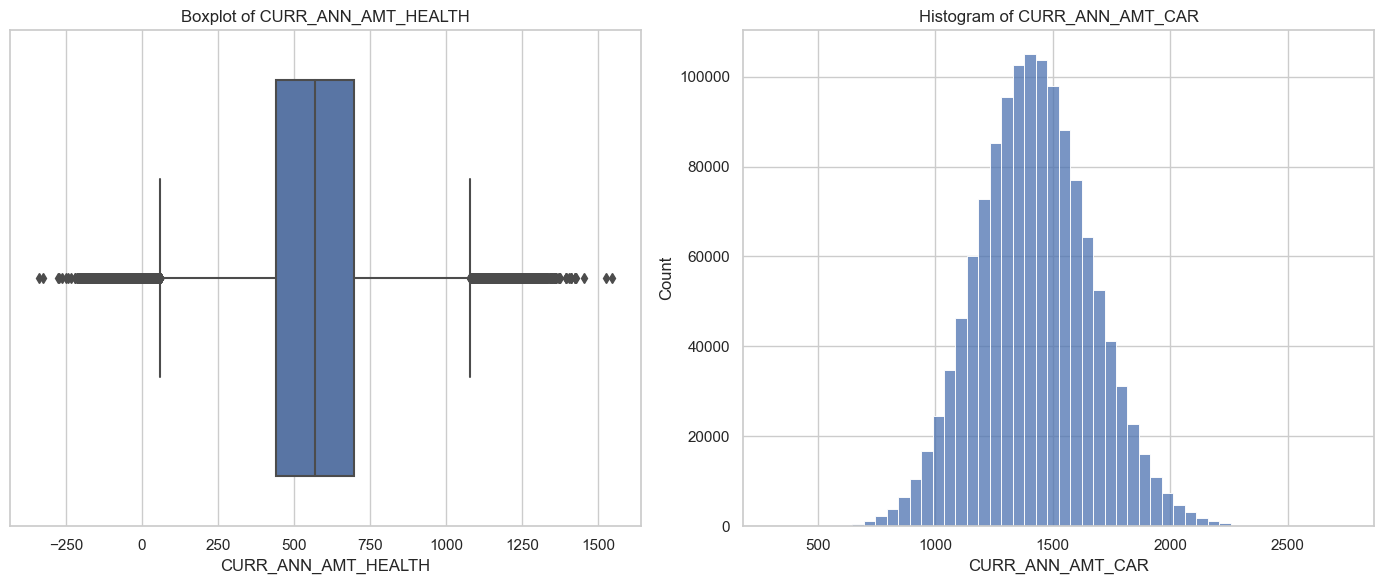

In [830]:
plt.figure(figsize=(14, 6))

boxplot_data = customer_df_step4
# First subplot
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.boxplot(data=boxplot_data, x='CURR_ANN_AMT_HEALTH')
plt.title('Boxplot of CURR_ANN_AMT_HEALTH')

# Second subplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.histplot(data=boxplot_data, x='CURR_ANN_AMT_CAR', bins=50)
plt.title('Histogram of CURR_ANN_AMT_CAR')

# Show the plots
plt.tight_layout()  # Adjust the subplots to fit in to the figure area.
plt.show()

##### demographics_df

###### Advanced Studies -> 0/1

In [831]:
demographics_df_step5 = demographics_df_step4

In [832]:
demographics_df_step4.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           2112579 non-null  float64
 1   INCOME                  2112579 non-null  float64
 2   HAS_CHILDREN            2112579 non-null  bool   
 3   LENGTH_OF_RESIDENCE     2112579 non-null  float64
 4   HOME_MARKET_VALUE       2112579 non-null  object 
 5   HOME_OWNER              2112579 non-null  int64  
 6   COLLEGE_DEGREE          2112579 non-null  int64  
 7   GOOD_CREDIT             2112579 non-null  int64  
 8   ADVANCED_STUDIES        2112579 non-null  object 
 9   MARITAL_STATUS_Married  2112579 non-null  uint8  
 10  MARITAL_STATUS_Single   2112579 non-null  uint8  
dtypes: bool(1), float64(3), int64(3), object(2), uint8(2)
memory usage: 135.0+ MB


In [833]:
demographics_df_step5.head()

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single
0,2.213028e+11,187500.000,True,8.0,300000 - 349999,1,1,1,Y,0,1
1,2.213032e+11,63750.000,True,0.0,0,0,0,0,N,0,1
2,2.213032e+11,41250.000,True,15.0,75000 - 99999,1,0,1,N,1,0
3,2.213032e+11,120558.264,True,0.0,1000 - 24999,1,0,0,N,0,0
4,2.213032e+11,187500.000,True,0.0,0,0,0,1,Y,0,0


In [834]:
demographics_df_step5['ADVANCED_STUDIES'] = demographics_df_step5['ADVANCED_STUDIES'].replace({'Y': 1, 'N': 0})

In [839]:
demographics_df_step3['HAS_CHILDREN'] = demographics_df_step3['HAS_CHILDREN'].astype(int)

Transform boolean values into integers for "HAS_CHILDREN" column

In [840]:
demographics_df_step5.head()

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single
0,2.213028e+11,187500.000,1,8.0,300000 - 349999,1,1,1,1,0,1
1,2.213032e+11,63750.000,1,0.0,0,0,0,0,0,0,1
2,2.213032e+11,41250.000,1,15.0,75000 - 99999,1,0,1,0,1,0
3,2.213032e+11,120558.264,1,0.0,1000 - 24999,1,0,0,0,0,0
4,2.213032e+11,187500.000,1,0.0,0,0,0,1,1,0,0


In [841]:
demographics_df_step5.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           2112579 non-null  float64
 1   INCOME                  2112579 non-null  float64
 2   HAS_CHILDREN            2112579 non-null  int64  
 3   LENGTH_OF_RESIDENCE     2112579 non-null  float64
 4   HOME_MARKET_VALUE       2112579 non-null  object 
 5   HOME_OWNER              2112579 non-null  int64  
 6   COLLEGE_DEGREE          2112579 non-null  int64  
 7   GOOD_CREDIT             2112579 non-null  int64  
 8   ADVANCED_STUDIES        2112579 non-null  int64  
 9   MARITAL_STATUS_Married  2112579 non-null  uint8  
 10  MARITAL_STATUS_Single   2112579 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 149.1+ MB


##### termination_df

In [845]:
termination_df_step5 = termination_df_step4

Remove all termination dates more than 10 years into the future.

In [849]:
termination_df_step5 = termination_df_step5[termination_df_step5['SUSPD_DATE'].dt.year <= 2033]

In [850]:
termination_df_step5

,INDIVIDUAL_ID,SUSPD_DATE
0,2.213026e+11,2022-10-09
1,2.213028e+11,2022-04-24
2,2.213027e+11,2022-05-21
3,2.213002e+11,2022-04-27
4,2.213026e+11,2022-09-16
...,...,...
269254,2.213022e+11,2022-01-09
269255,2.213007e+11,2022-02-27
269256,2.213030e+11,2022-03-21
269257,2.213025e+11,2022-02-26


##### Issues in the customer_df dataset

1. Missing values for the "CUST_START_DATE" column.
2. Checked the value counts for this column and noted that the majority (535000) of the Start dates are 2005-09-11. Therefore, I filled the rest of these values with the same date, assuming that this date is either a dummy date or a human error. 
3. 404695 entries have their birthday on the 7th of July 1967. While this could be a coincidence this high number suggests, that the birth date can't be a relevant variable because the number of ID's in the dataset are too skewed towards that date.
4. The Customer Original Date (the date the customer originally joined) is equally high represented as the "CUST_START_DATE". 599153 entries for the date *2005-09-11*

##### Issues in the demographcis_df dataset

1. "Advanced Studies" column with "Y" and "N" values. Transformed these into boolean values

Checking if the termination ID's can match with the ID's of customer DF

In [ ]:
#termination_id_check = termination_df["INDIVIDUAL_ID"]

In [ ]:
#id_check_df = pd.merge(customer_df, termination_df, on="INDIVIDUAL_ID")

In [ ]:
#id_check_df.info(show_counts=True)

In [ ]:
#customer_df.loc[customer_df['INDIVIDUAL_ID'] == 2.213022e+11]

#### Merging Dataframes

1.9 mil

In [1099]:
customer_demographic_df = pd.merge(customer_df_step5, demographics_df_step5, how="inner",on= "INDIVIDUAL_ID")

In [1100]:
customer_demographic_df.shape

(1103281, 19)

In [1101]:
customer_demographic_df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,0,15.0,50000 - 74999,1,1,1,0,1,0
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,1,2.0,50000 - 74999,1,0,0,0,0,1
2,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,0,6.0,175000 - 199999,1,0,1,0,1,0
3,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1,4.0,225000 - 249999,1,1,1,1,1,0
4,2.213027e+11,5.213010e+11,2021-08-05,1990-04-20,194-XX-6050,2021-08-05,1409.916163,774.163467,408,78750.0,1,2.0,125000 - 149999,1,0,1,0,1,0


In [1102]:
categorical_columns = customer_demographic_df.select_dtypes(include=['object', 'category']).columns

In [1103]:
customer_demographic_df.describe()

,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single
count,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06,1.103281e+06
mean,2.213018e+11,5.213007e+11,1.423253e+03,5.701373e+02,4.269876e+02,1.223116e+05,9.689000e-01,6.952567e+00,7.603684e-01,3.430169e-01,8.346287e-01,2.486610e-01,5.532507e-01,3.354250e-01
std,9.910460e+05,4.165231e+05,2.407720e+02,1.880921e+02,7.514266e+01,7.677356e+04,1.735880e-01,5.039275e+00,4.268588e-01,4.747173e-01,3.715155e-01,4.322371e-01,4.971565e-01,4.721390e-01
min,2.213000e+11,5.213000e+11,3.056869e+02,5.760346e-02,9.300000e+01,7.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,1.258967e+03,4.419229e+02,3.760000e+02,7.125000e+04,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.213018e+11,5.213007e+11,1.418504e+03,5.692239e+02,4.250000e+02,1.050000e+05,1.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.213027e+11,5.213010e+11,1.582165e+03,6.970715e+02,4.760000e+02,1.312500e+05,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.213033e+11,5.213015e+11,2.697305e+03,1.544589e+03,8.660000e+02,3.750000e+05,1.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [1104]:
customer_demographic_df.describe(include=["object", "bool"])

,SOCIAL_SECURITY_NUMBER,HOME_MARKET_VALUE
count,1103281,1103281
unique,1031344,20
top,590-XX-8083,75000 - 99999
freq,5,197180


In [1105]:
customer_demographic_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103281 entries, 0 to 1103280
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   INDIVIDUAL_ID           1103281 non-null  float64       
 1   ADDRESS_ID              1103281 non-null  float64       
 2   CUST_ORIG_DATE          1103281 non-null  datetime64[ns]
 3   DATE_OF_BIRTH           1103281 non-null  datetime64[ns]
 4   SOCIAL_SECURITY_NUMBER  1103281 non-null  object        
 5   CUST_START_DATE         1103281 non-null  datetime64[ns]
 6   CURR_ANN_AMT_CAR        1103281 non-null  float64       
 7   CURR_ANN_AMT_HEALTH     1103281 non-null  float64       
 8   CURR_ANN_AMT_HOUSE      1103281 non-null  int64         
 9   INCOME                  1103281 non-null  float64       
 10  HAS_CHILDREN            1103281 non-null  int64         
 11  LENGTH_OF_RESIDENCE     1103281 non-null  float64       
 12  HOME_MARKET_VA

#### Further Context Data Quality Checks

Completeness
Consistency
Correctness
Uniqueness
Timeliness
Stability
Relevance
Contextualization
Trustworthiness

Target Variable: Terminated

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


The data cleansing and exploration process for ABC Insurance's customer, demographic, and termination datasets reveals crucial insights and challenges. Significant data preprocessing was necessary due to duplicate entries, missing data, and outliers, emphasizing the importance of understanding the business context for data cleaning. Anomalies such as a high frequency of specific customer start dates and birth dates highlight potential data collection or entry issues.

Transforming categorical variables for analysis and dealing with the diverse customer base's varying income levels and insurance payments underscore the complexity of the customer profiles. Merging the datasets provides a foundation for predictive modeling of customer churn but also showcases the challenges in working with real-world data.

In summary, while the datasets offer valuable insights for customer behavior analysis and churn prediction, the process underscores the need for improved data quality and sophisticated analytical techniques. For ABC Insurance, enhancing data collection and validation processes is as crucial as employing advanced analytics to develop targeted customer retention and optimization strategies in a competitive market.

## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

#### Developing Training, Development & Test Set 

#### Feature Engineering

In [1225]:
customer_demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103281 entries, 0 to 1103280
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   INDIVIDUAL_ID           1103281 non-null  float64       
 1   ADDRESS_ID              1103281 non-null  float64       
 2   CUST_ORIG_DATE          1103281 non-null  datetime64[ns]
 3   DATE_OF_BIRTH           1103281 non-null  datetime64[ns]
 4   SOCIAL_SECURITY_NUMBER  1103281 non-null  object        
 5   CUST_START_DATE         1103281 non-null  datetime64[ns]
 6   CURR_ANN_AMT_CAR        1103281 non-null  float64       
 7   CURR_ANN_AMT_HEALTH     1103281 non-null  float64       
 8   CURR_ANN_AMT_HOUSE      1103281 non-null  int64         
 9   INCOME                  1103281 non-null  float64       
 10  HAS_CHILDREN            1103281 non-null  int64         
 11  LENGTH_OF_RESIDENCE     1103281 non-null  float64       
 12  HOME_MARKET_VA

###### Total Annual Amount

In [1227]:
customer_demographic_df_feature_eng = customer_demographic_df

In [1228]:
customer_demographic_df_feature_eng['Customer_Value'] = customer_demographic_df_feature_eng['CURR_ANN_AMT_CAR'] + customer_demographic_df_feature_eng['CURR_ANN_AMT_HEALTH'] + customer_demographic_df_feature_eng['CURR_ANN_AMT_HOUSE']

###### Calculate Customer Age at Start Date

In [1229]:
customer_demographic_df_feature_eng['AGE_AT_START'] = customer_demographic_df_feature_eng.apply(
    lambda row: (row['CUST_START_DATE'] - row['DATE_OF_BIRTH']).days // 365,
    axis=1
)

##### Customer Tenure

In [1230]:
snapshot_date = customer_demographic_df_feature_eng['CUST_START_DATE'].max()
customer_demographic_df_feature_eng['TENURE_YEARS'] = customer_demographic_df_feature_eng.apply(
    lambda row: (snapshot_date - row['CUST_START_DATE']).days // 365,
    axis=1
)

##### customer age

In [1231]:
from datetime import datetime

current_date = datetime.now()
customer_demographic_df_feature_eng['AGE_AT_DATE'] = customer_demographic_df_feature_eng['DATE_OF_BIRTH'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

In [1232]:
customer_demographic_df_feature_eng

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,...,MARITAL_STATUS_Married,MARITAL_STATUS_Single,Customer_Value,AGE_AT_START,TENURE_YEARS,AGE_AT_DATE,START_YEAR,START_MONTH,START_DAY,BIRTH_MONTH
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.000,...,1,0,2247.877314,40,4,45,2018,12,9,6
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.000,...,0,1,2446.616961,67,5,73,2018,1,2,5
2,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.000,...,1,0,2356.927051,53,1,54,2022,7,25,5
3,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.000,...,1,0,2423.490716,34,17,51,2006,10,11,9
4,2.213027e+11,5.213010e+11,2021-08-05,1990-04-20,194-XX-6050,2021-08-05,1409.916163,774.163467,408,78750.000,...,1,0,2592.079630,31,2,33,2021,8,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103276,2.213015e+11,5.213005e+11,2013-12-28,1945-07-01,498-XX-6384,2013-12-28,1104.096865,314.218724,346,131250.000,...,1,0,1764.315589,68,9,78,2013,12,28,7
1103277,2.213026e+11,5.213009e+11,2013-08-08,1981-09-22,960-XX-3949,2013-08-08,1755.570597,751.803637,492,187500.000,...,1,0,2999.374234,31,10,42,2013,8,8,9
1103278,2.213008e+11,5.213003e+11,2019-06-23,1970-07-26,730-XX-5654,2019-06-23,1604.105051,826.368696,485,131250.000,...,0,1,2915.473747,48,4,53,2019,6,23,7
1103279,2.213004e+11,5.213001e+11,2022-07-13,1985-07-22,306-XX-2712,2022-07-13,1689.749774,870.687170,500,120558.264,...,0,0,3060.436944,37,1,38,2022,7,13,7


##### Extract Year/Month/Day Features

In [1233]:
# Extract year, month, and day from 'CUST_START_DATE'
customer_demographic_df_feature_eng['START_YEAR'] = customer_demographic_df_feature_eng['CUST_START_DATE'].dt.year
customer_demographic_df_feature_eng['START_MONTH'] = customer_demographic_df_feature_eng['CUST_START_DATE'].dt.month
customer_demographic_df_feature_eng['START_DAY'] = customer_demographic_df_feature_eng['CUST_START_DATE'].dt.day

# Similarly, you can extract features from 'DATE_OF_BIRTH' if relevant
customer_demographic_df_feature_eng['BIRTH_MONTH'] = customer_demographic_df_feature_eng['DATE_OF_BIRTH'].dt.month

##### Remove Social Security Number & Address ID

In [1234]:
customer_demographic_df_feature_eng = customer_demographic_df_feature_eng.drop(columns=['SOCIAL_SECURITY_NUMBER', 'ADDRESS_ID'])

##### Income into bins

In [1235]:
# Create 4 quantile-based bins of the 'INCOME' column
customer_demographic_df_feature_eng['INCOME_BIN'] = pd.qcut(customer_demographic_df_feature_eng['INCOME'], q=5, labels=['Very Low','Low', 'Medium', 'High', 'Very High'])

# Check the first few rows to see the new 'INCOME_BIN' column
print(customer_demographic_df_feature_eng[['INCOME', 'INCOME_BIN']].head())
customer_demographic_df_feature_eng['INCOME_BIN'].value_counts()

     INCOME INCOME_BIN
0   33750.0   Very Low
1   41250.0   Very Low
2  187500.0       High
3  131250.0       High
4   78750.0        Low


High         346273
Low          326392
Very Low     227600
Medium       126030
Very High     76986
Name: INCOME_BIN, dtype: int64

In [1236]:
income_value_mapping = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
'High': 3,
'Very High' : 4,
}


# Apply the mapping to convert string ranges to their numeric representation
customer_demographic_df_feature_eng['Income_Numeric_Bins'] = customer_demographic_df_feature_eng['INCOME_BIN'].map(income_value_mapping)

customer_demographic_df_feature_eng['Income_Numeric_Bins'] = customer_demographic_df_feature_eng['Income_Numeric_Bins'].astype('int64')

# Check the conversion
print(customer_demographic_df_feature_eng[['INCOME_BIN', 'Income_Numeric_Bins']].head())


  INCOME_BIN  Income_Numeric_Bins
0   Very Low                    0
1   Very Low                    0
2       High                    3
3       High                    3
4        Low                    1


##### Market Value Bins

In [1237]:
customer_demographic_df_feature_eng['HOME_MARKET_VALUE'].value_counts()

75000 - 99999      197180
100000 - 124999    181438
50000 - 74999      138237
125000 - 149999    138150
150000 - 174999     97129
0                   71976
175000 - 199999     64481
25000 - 49999       53666
200000 - 224999     44471
225000 - 249999     30241
250000 - 274999     20096
1000 - 24999        16685
300000 - 349999     13230
275000 - 299999     12231
350000 - 399999      7455
500000 - 749999      6129
400000 - 449999      4258
450000 - 499999      3047
750000 - 999999      1959
1000000 Plus         1222
Name: HOME_MARKET_VALUE, dtype: int64

In [1238]:
# Mapping each range to its midpoint
market_value_mapping = {
    '0': 0,
    '1000 - 24999': (1000 + 24999) / 2,
    '25000 - 49999': (25000 + 49999) / 2,
    '50000 - 74999': (50000 + 74999) / 2,
    '75000 - 99999': (75000 + 99999) / 2,
    '100000 - 124999': (100000 + 124999) / 2,
    '125000 - 149999': (125000 + 149999) / 2,
    '150000 - 174999': (150000 + 174999) / 2,
    '175000 - 199999': (175000 + 199999) / 2,
    '200000 - 224999': (200000 + 224999) / 2,
    '225000 - 249999': (225000 + 249999) / 2,
    '250000 - 274999': (250000 + 274999) / 2,
    '275000 - 299999': (275000 + 299999) / 2,
    '300000 - 349999': (300000 + 349999) / 2,
    '350000 - 399999': (350000 + 399999) / 2,
    '400000 - 449999': (400000 + 449999) / 2,
    '450000 - 499999': (450000 + 499999) / 2,
    '500000 - 749999': (500000 + 749999) / 2,
    '750000 - 999999': (750000 + 999999) / 2,
    '1000000 Plus': 1000000 
}

# Apply the mapping to convert string ranges to their numeric representation
customer_demographic_df_feature_eng['HOME_MARKET_VALUE_NUMERIC'] = customer_demographic_df_feature_eng['HOME_MARKET_VALUE'].map(market_value_mapping)

# Check the conversion
print(customer_demographic_df_feature_eng[['HOME_MARKET_VALUE', 'HOME_MARKET_VALUE_NUMERIC']].head())


  HOME_MARKET_VALUE  HOME_MARKET_VALUE_NUMERIC
0     50000 - 74999                    62499.5
1     50000 - 74999                    62499.5
2   175000 - 199999                   187499.5
3   225000 - 249999                   237499.5
4   125000 - 149999                   137499.5


In [1239]:
customer_demographic_df_feature_eng['HOME_MARKET_VALUE_NUMERIC'] = customer_demographic_df_feature_eng['HOME_MARKET_VALUE_NUMERIC'].fillna(0)

In [1240]:
customer_demographic_df_feature_eng.isnull().sum()

INDIVIDUAL_ID                0
CUST_ORIG_DATE               0
DATE_OF_BIRTH                0
CUST_START_DATE              0
CURR_ANN_AMT_CAR             0
CURR_ANN_AMT_HEALTH          0
CURR_ANN_AMT_HOUSE           0
INCOME                       0
HAS_CHILDREN                 0
LENGTH_OF_RESIDENCE          0
HOME_MARKET_VALUE            0
HOME_OWNER                   0
COLLEGE_DEGREE               0
GOOD_CREDIT                  0
ADVANCED_STUDIES             0
MARITAL_STATUS_Married       0
MARITAL_STATUS_Single        0
Customer_Value               0
AGE_AT_START                 0
TENURE_YEARS                 0
AGE_AT_DATE                  0
START_YEAR                   0
START_MONTH                  0
START_DAY                    0
BIRTH_MONTH                  0
INCOME_BIN                   0
Income_Numeric_Bins          0
HOME_MARKET_VALUE_NUMERIC    0
dtype: int64

##### Customer Tenure Total

In [1241]:
customer_demographic_df_feature_eng['TENURE_MONTHS'] = (customer_demographic_df_feature_eng['CUST_START_DATE'].dt.year - customer_demographic_df_feature_eng['CUST_ORIG_DATE'].dt.year) * 12 + (customer_demographic_df_feature_eng['CUST_START_DATE'].dt.month - customer_demographic_df_feature_eng['CUST_ORIG_DATE'].dt.month)

#### Feature Selection

#### Normalization

Normalize numerical columns for better model performance

In [1242]:
# from sklearn.preprocessing import StandardScaler
# 
# #columns_to_normalize = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'INCOME']
# 
# scaler = StandardScaler()
# 
# customer_demographic_df_feature_eng[columns_to_normalize] = scaler.fit_transform(customer_demographic_df_feature_eng[columns_to_normalize])

In [1243]:
customer_demographic_df_feature_eng.dtypes

INDIVIDUAL_ID                       float64
CUST_ORIG_DATE               datetime64[ns]
DATE_OF_BIRTH                datetime64[ns]
CUST_START_DATE              datetime64[ns]
CURR_ANN_AMT_CAR                    float64
CURR_ANN_AMT_HEALTH                 float64
CURR_ANN_AMT_HOUSE                    int64
INCOME                              float64
HAS_CHILDREN                          int64
LENGTH_OF_RESIDENCE                 float64
HOME_MARKET_VALUE                    object
HOME_OWNER                            int64
COLLEGE_DEGREE                        int64
GOOD_CREDIT                           int64
ADVANCED_STUDIES                      int64
MARITAL_STATUS_Married                uint8
MARITAL_STATUS_Single                 uint8
Customer_Value                      float64
AGE_AT_START                          int64
TENURE_YEARS                          int64
AGE_AT_DATE                           int64
START_YEAR                            int64
START_MONTH                     

Turn datetime into integers

In [1244]:
# # Convert datetimes into timestamp objects
# for column in customer_demographic_df_feature_eng.columns:
#     if pd.api.types.is_datetime64_any_dtype(customer_demographic_df_feature_eng[column]):
#         customer_demographic_df_feature_eng[column] = customer_demographic_df_feature_eng[column].astype('int64')

In [1245]:
customer_demographic_df_feature_eng.dtypes

INDIVIDUAL_ID                       float64
CUST_ORIG_DATE               datetime64[ns]
DATE_OF_BIRTH                datetime64[ns]
CUST_START_DATE              datetime64[ns]
CURR_ANN_AMT_CAR                    float64
CURR_ANN_AMT_HEALTH                 float64
CURR_ANN_AMT_HOUSE                    int64
INCOME                              float64
HAS_CHILDREN                          int64
LENGTH_OF_RESIDENCE                 float64
HOME_MARKET_VALUE                    object
HOME_OWNER                            int64
COLLEGE_DEGREE                        int64
GOOD_CREDIT                           int64
ADVANCED_STUDIES                      int64
MARITAL_STATUS_Married                uint8
MARITAL_STATUS_Single                 uint8
Customer_Value                      float64
AGE_AT_START                          int64
TENURE_YEARS                          int64
AGE_AT_DATE                           int64
START_YEAR                            int64
START_MONTH                     

In [1246]:
len(customer_demographic_df_feature_eng)

1103281

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/3460109412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_demographic_df_feature_eng.corr()


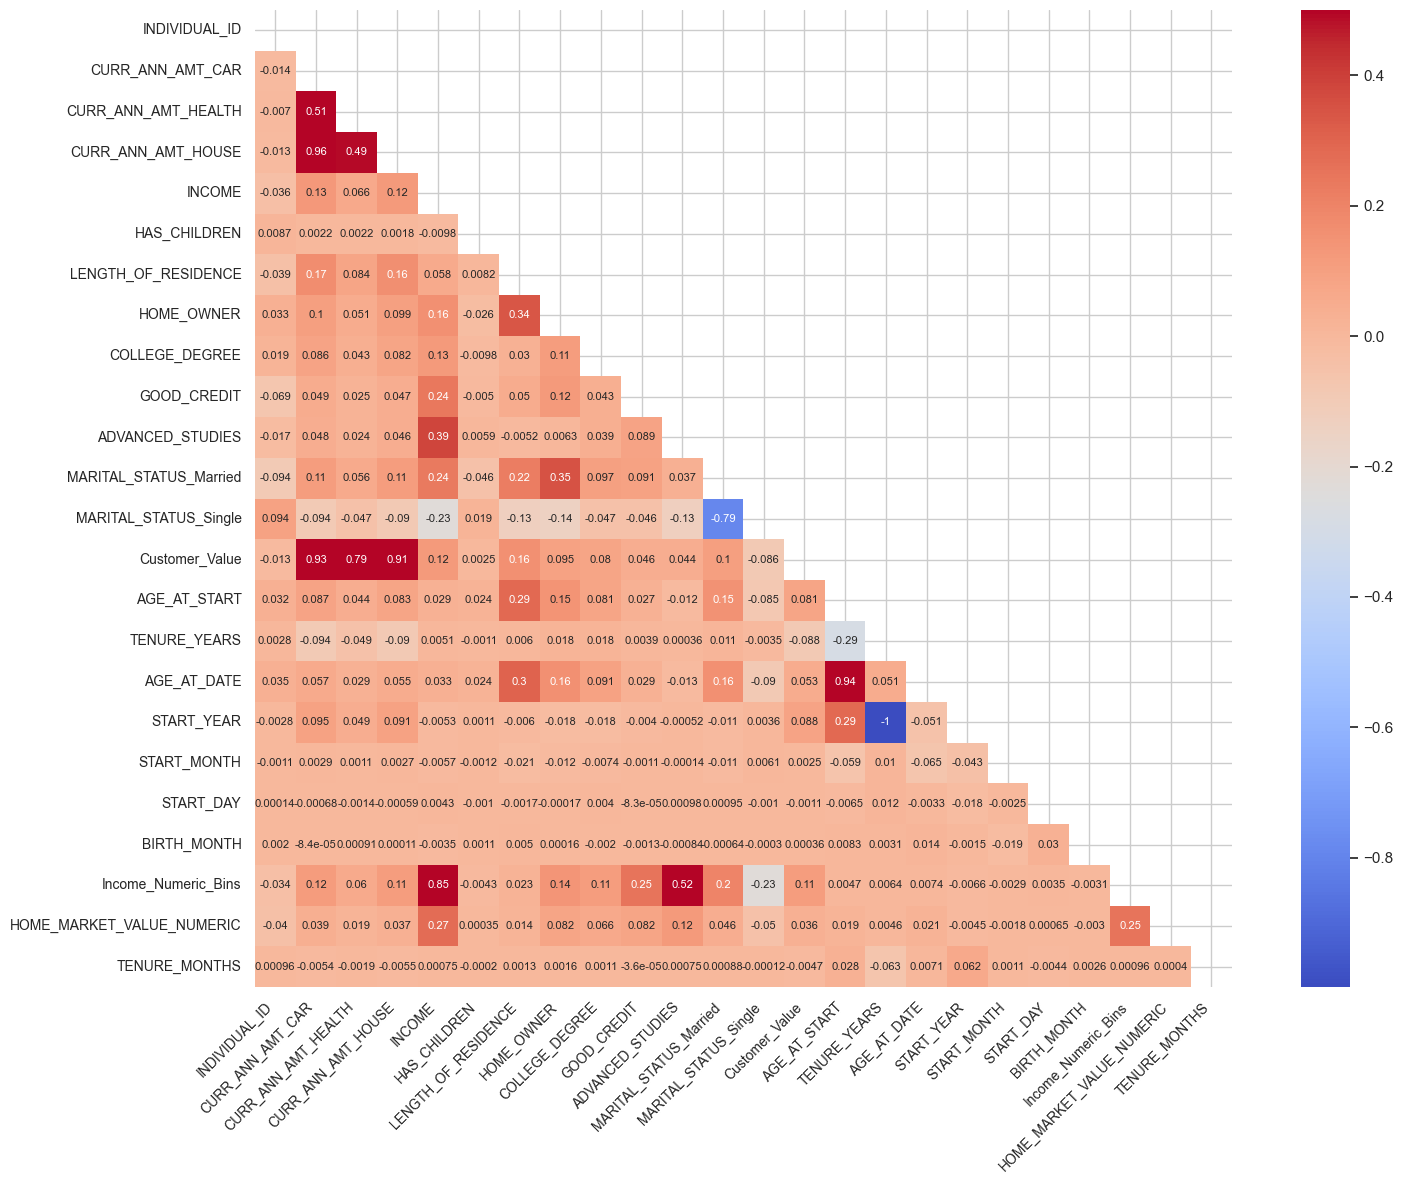

In [1247]:
corr = customer_demographic_df_feature_eng.corr()

# Increase the figure size
plt.figure(figsize=(16, 12))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap with adjusted font size and rotated labels
sns.heatmap(corr, mask=mask, vmax=.5, square=True, annot=True, annot_kws={"size": 8}, cmap='coolwarm')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot with a tight layout to ensure no overlapping
plt.tight_layout()
plt.show()

#### Creating Training, Development & Test Set

In [1248]:
customer_demographic_df_feature_eng

,INDIVIDUAL_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,...,TENURE_YEARS,AGE_AT_DATE,START_YEAR,START_MONTH,START_DAY,BIRTH_MONTH,INCOME_BIN,Income_Numeric_Bins,HOME_MARKET_VALUE_NUMERIC,TENURE_MONTHS
0,2.213000e+11,2018-12-09,1978-06-23,2018-12-09,1318.877997,517.999317,411,33750.000,0,15.000,...,4,45,2018,12,9,6,Very Low,0,62499.5,0
1,2.213001e+11,2018-01-02,1950-05-30,2018-01-02,1474.199182,558.417779,414,41250.000,1,2.000,...,5,73,2018,1,2,5,Very Low,0,62499.5,0
2,2.213016e+11,2022-07-25,1969-05-25,2022-07-25,1492.409561,401.517490,463,187500.000,0,6.000,...,1,54,2022,7,25,5,High,3,187499.5,0
3,2.213016e+11,2006-10-11,1972-09-25,2006-10-11,1284.633494,772.857222,366,131250.000,1,4.000,...,17,51,2006,10,11,9,High,3,237499.5,0
4,2.213027e+11,2021-08-05,1990-04-20,2021-08-05,1409.916163,774.163467,408,78750.000,1,2.000,...,2,33,2021,8,5,4,Low,1,137499.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103276,2.213015e+11,2013-12-28,1945-07-01,2013-12-28,1104.096865,314.218724,346,131250.000,1,1.000,...,9,78,2013,12,28,7,High,3,137499.5,0
1103277,2.213026e+11,2013-08-08,1981-09-22,2013-08-08,1755.570597,751.803637,492,187500.000,1,12.000,...,10,42,2013,8,8,9,High,3,137499.5,0
1103278,2.213008e+11,2019-06-23,1970-07-26,2019-06-23,1604.105051,826.368696,485,131250.000,1,11.000,...,4,53,2019,6,23,7,High,3,87499.5,0
1103279,2.213004e+11,2022-07-13,1985-07-22,2022-07-13,1689.749774,870.687170,500,120558.264,1,6.801,...,1,38,2022,7,13,7,Medium,2,112499.5,0


In [1249]:
customer_value_df = customer_demographic_df_feature_eng

In [1250]:
customer_value_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103281 entries, 0 to 1103280
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   INDIVIDUAL_ID              1103281 non-null  float64       
 1   CUST_ORIG_DATE             1103281 non-null  datetime64[ns]
 2   DATE_OF_BIRTH              1103281 non-null  datetime64[ns]
 3   CUST_START_DATE            1103281 non-null  datetime64[ns]
 4   CURR_ANN_AMT_CAR           1103281 non-null  float64       
 5   CURR_ANN_AMT_HEALTH        1103281 non-null  float64       
 6   CURR_ANN_AMT_HOUSE         1103281 non-null  int64         
 7   INCOME                     1103281 non-null  float64       
 8   HAS_CHILDREN               1103281 non-null  int64         
 9   LENGTH_OF_RESIDENCE        1103281 non-null  float64       
 10  HOME_MARKET_VALUE          1103281 non-null  object        
 11  HOME_OWNER                 1103281 no

###### Feature Selection

In [1251]:
#customer_value_df = customer_value_df.drop(columns=['SOCIAL_SECURITY_NUMBER','Unnamed: 0' ])

In [1252]:
customer_value_df.isnull().sum()

INDIVIDUAL_ID                0
CUST_ORIG_DATE               0
DATE_OF_BIRTH                0
CUST_START_DATE              0
CURR_ANN_AMT_CAR             0
CURR_ANN_AMT_HEALTH          0
CURR_ANN_AMT_HOUSE           0
INCOME                       0
HAS_CHILDREN                 0
LENGTH_OF_RESIDENCE          0
HOME_MARKET_VALUE            0
HOME_OWNER                   0
COLLEGE_DEGREE               0
GOOD_CREDIT                  0
ADVANCED_STUDIES             0
MARITAL_STATUS_Married       0
MARITAL_STATUS_Single        0
Customer_Value               0
AGE_AT_START                 0
TENURE_YEARS                 0
AGE_AT_DATE                  0
START_YEAR                   0
START_MONTH                  0
START_DAY                    0
BIRTH_MONTH                  0
INCOME_BIN                   0
Income_Numeric_Bins          0
HOME_MARKET_VALUE_NUMERIC    0
TENURE_MONTHS                0
dtype: int64

In [1253]:
# Feature matrix
feature_excluding = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'HOME_MARKET_VALUE', 'INCOME_BIN' ]
X_base = customer_value_df.drop(columns=feature_excluding + ['Customer_Value'], axis=1)
y_base = customer_value_df['Customer_Value'] 

In [1254]:
from sklearn.model_selection import train_test_split

# Train & Test split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42)


In [1255]:
# # Split training set into separate training and development sets
# X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

##### First Model

Mean Squared Error: 182768.14700599213
Root Mean Squared Error: 427.5139144004463


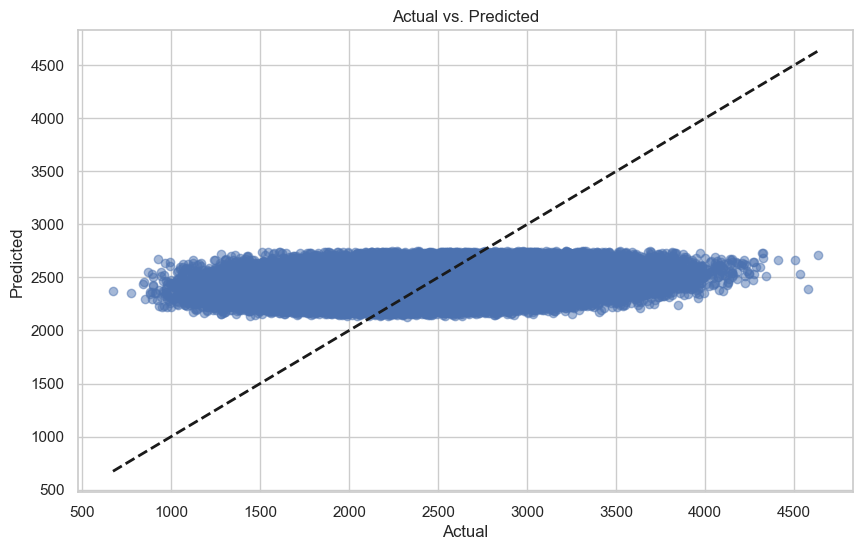

In [1256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_base, y_train_base)

# Make predictions on the testing set
y_pred_base = model.predict(X_test_base)

# Evaluating the model
mse = mean_squared_error(y_test_base, y_pred_base)
print(f'Mean Squared Error: {mse}')

rmse = math.sqrt(mse)
import math
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_base, y_pred_base, alpha=0.5)
plt.plot([y_test_base.min(), y_test_base.max()], [y_test_base.min(), y_test_base.max()], 'k--', lw=2)  # Perfect predictions line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

plt.show()


##### Polynomial Regression

In [1281]:
# Feature matrix
feature_excluding = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'HOME_MARKET_VALUE', 'INCOME_BIN' ]
X_base = customer_value_df.drop(columns=feature_excluding + ['Customer_Value'], axis=1)
y_base = customer_value_df['Customer_Value']

In [1282]:
from sklearn.model_selection import train_test_split

# Train & Test split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42)


Polynomial Regression Mean Squared Error: 182637.03578568788
Polynomial Regression Root Mean Squared Error: 427.36054542468924


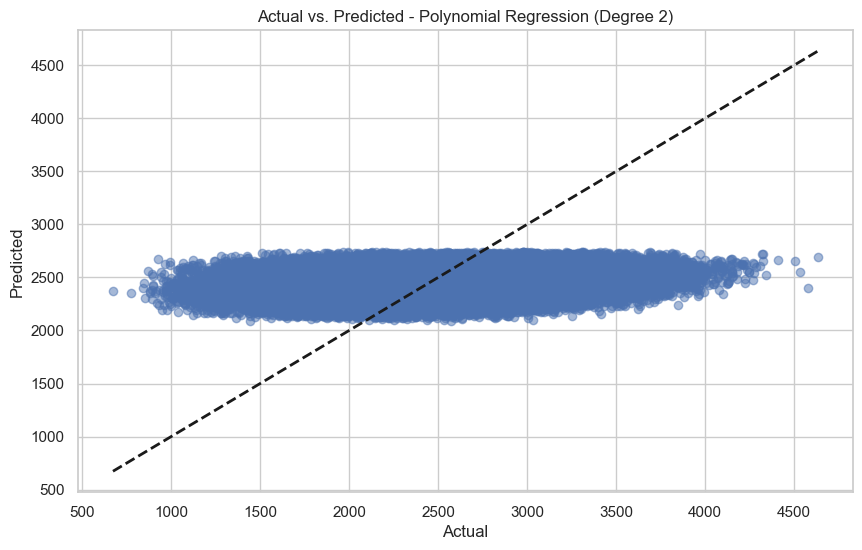

In [1283]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import math

# Create polynomial features with degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_base)
X_test_poly = poly.transform(X_test_base)

# Initialize the model
model_poly = LinearRegression()

# Fit the model on the polynomial training data
model_poly.fit(X_train_poly, y_train_base)

# Make predictions on the polynomial testing set
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluating the model
mse_poly = mean_squared_error(y_test_base, y_pred_poly)
print(f'Polynomial Regression Mean Squared Error: {mse_poly}')

# Calculate Root Mean Squared Error for the polynomial model
rmse_poly = math.sqrt(mse_poly)
print(f'Polynomial Regression Root Mean Squared Error: {rmse_poly}')

# Plot actual vs predicted values for the polynomial model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_base, y_pred_poly, alpha=0.5)
plt.plot([y_test_base.min(), y_test_base.max()], [y_test_base.min(), y_test_base.max()], 'k--', lw=2)  # Perfect predictions line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted - Polynomial Regression (Degree 2)')

plt.show()


There is a dense concentration of points along the center, suggesting that for many observations, the model predicts values that are close to the actual values. However, the spread becomes wider as the actual values increase, indicating less accuracy for higher values.

The dashed line represents the line of perfect prediction. Points that lie on this line are where the model's predictions are exactly correct.

##### Adjusted Feature Selection

In [1257]:
correlation_matrix = customer_value_df.corr()

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/518728944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_value_df.corr()


/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/1462116254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_value_df.corr()


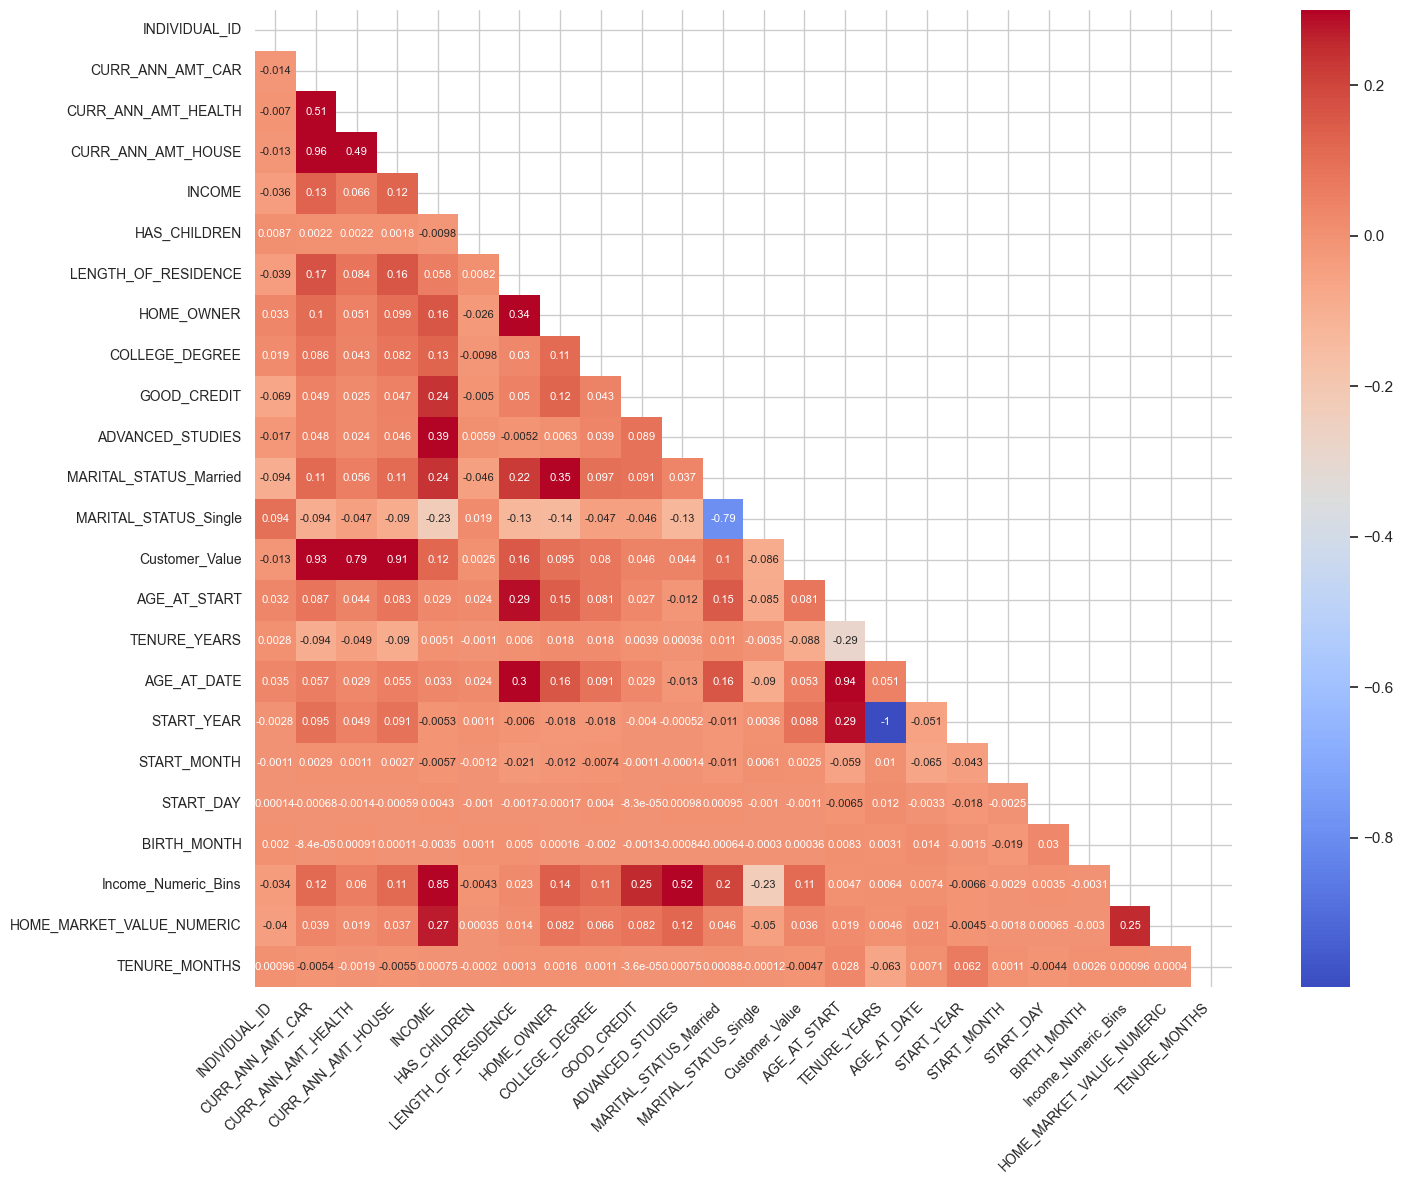

In [1258]:
corr = customer_value_df.corr()

# Increase the figure size
plt.figure(figsize=(16, 12))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap with adjusted font size and rotated labels
sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, annot_kws={"size": 8}, cmap='coolwarm')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot with a tight layout to ensure no overlapping
plt.tight_layout()
plt.show()

In [1271]:
threshold = 0.1
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix["Customer_Value"]) > threshold].tolist()
highly_correlated_features.remove("Customer_Value")
highly_correlated_features.remove("CURR_ANN_AMT_CAR")
highly_correlated_features.remove("CURR_ANN_AMT_HEALTH")
highly_correlated_features.remove("CURR_ANN_AMT_HOUSE")
print(highly_correlated_features)

['INCOME', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS_Married', 'Income_Numeric_Bins']


In [1285]:
# Feature matrix
features_base_model = ['INCOME', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS_Married', 'Income_Numeric_Bins']
X = customer_value_df[features_base_model]
y = customer_value_df['Customer_Value']  # Customer annual amount 

Insights: Simple Linear Regression model works great as base model

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

##### Model

Using Random Forrest Regressor for second model.

In [917]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [1192]:
# Feature matrix
feature_excluding = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'HOME_MARKET_VALUE', 'INCOME_BIN' ]
X_reg_2nd = customer_value_df.drop(columns=feature_excluding + ['Customer_Value'], axis=1)
y_reg_2nd = customer_value_df['Customer_Value']

In [1194]:
# Assuming X_reg_2nd and y_reg_2nd are defined properly
# Train & Test split
X_train_reg_2nd, X_test_2nd_reg_2nd, y_train_2nd_reg_2nd, y_test_2nd_reg_2nd = train_test_split(X_reg_2nd, y_reg_2nd, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
rf.fit(X_train_reg_2nd, y_train_2nd_reg_2nd)

# Make predictions on the testing set
y_pred_rf = rf.predict(X_test_2nd_reg_2nd)  # Corrected to predict on the test set

# Evaluate the model
mse_rf = mean_squared_error(y_test_2nd_reg_2nd, y_pred_rf)  # Compare the predictions with the true values of the test set
print(f'Random Forest Mean Squared Error: {mse_rf}')


Random Forest Mean Squared Error: 191732.25837756766


#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

In [1195]:
print(f'Base Model (Linear Regression) Mean Squared Error: {mse_base}')
print(f'Random Forest Mean Squared Error: {mse_rf}')

Base Model (Linear Regression) Mean Squared Error: 185291.71114360617
Random Forest Mean Squared Error: 191732.25837756766



For ABC Insurance's Head of Marketing, the Linear Regression model is recommended for estimating customer value, based on its slightly lower Mean Squared Error (MSE) compared to the Random Forest model (185291.711 vs. 191732.258). Despite the modest difference, Linear Regression's interpretability and computational efficiency make it a preferable choice for application in marketing strategies and customer value assessment.

The model could be used to predict annual customer spending on various insurance products, enabling targeted marketing campaigns and personalized product offerings aimed at high-value customers. This approach could enhance customer retention and increase their lifetime value. For instance, strategies might focus on cross-selling to customers with a high likelihood of purchasing additional insurance products based on their demographic profiles.

Acknowledging the relatively high error rates of both models suggests the need for ongoing refinement, incorporating richer data and more sophisticated modeling techniques. Continuous improvement will help align predictions more closely with customer behavior, aiding ABC Insurance in reducing churn and maximizing customer value.

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

###### Merging Dataframes


In [1207]:
customer_churn_df = customer_value_df.merge(termination_df_step5, how= "left", on= 'INDIVIDUAL_ID')

,INDIVIDUAL_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,...,AGE_AT_DATE,START_YEAR,START_MONTH,START_DAY,BIRTH_MONTH,INCOME_BIN,Income_Numeric_Bins,HOME_MARKET_VALUE_NUMERIC,TENURE_MONTHS,SUSPD_DATE
0,2.213000e+11,2018-12-09,1978-06-23,2018-12-09,1318.877997,517.999317,411,33750.0,0,15.0,...,45,2018,12,9,6,Very Low,0,62499.5,0,NaT
1,2.213001e+11,2018-01-02,1950-05-30,2018-01-02,1474.199182,558.417779,414,41250.0,1,2.0,...,73,2018,1,2,5,Very Low,0,62499.5,0,NaT
2,2.213016e+11,2022-07-25,1969-05-25,2022-07-25,1492.409561,401.517490,463,187500.0,0,6.0,...,54,2022,7,25,5,High,3,187499.5,0,2021-12-22
3,2.213016e+11,2006-10-11,1972-09-25,2006-10-11,1284.633494,772.857222,366,131250.0,1,4.0,...,51,2006,10,11,9,High,3,237499.5,0,NaT
4,2.213027e+11,2021-08-05,1990-04-20,2021-08-05,1409.916163,774.163467,408,78750.0,1,2.0,...,33,2021,8,5,4,Low,1,137499.5,0,NaT


Remove unnecessary columns: "Home Market Value", "Income", "Cust Orig Date", "Cust Start Date", "Date of Birth"

Customer that suspended their policies. 

In [1208]:
customer_churn_df['Churned'] = customer_churn_df['SUSPD_DATE'].notna().astype(int)

In [1209]:
customer_churn_df = customer_churn_df.drop(columns=['HOME_MARKET_VALUE', 'INCOME', 'INCOME_BIN', 'CUST_ORIG_DATE', 'CUST_START_DATE', 'DATE_OF_BIRTH', 'SUSPD_DATE'])

In [1210]:
customer_churn_df.head()

,INDIVIDUAL_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,...,TENURE_YEARS,AGE_AT_DATE,START_YEAR,START_MONTH,START_DAY,BIRTH_MONTH,Income_Numeric_Bins,HOME_MARKET_VALUE_NUMERIC,TENURE_MONTHS,Churned
0,2.213000e+11,1318.877997,517.999317,411,0,15.0,1,1,1,0,...,4,45,2018,12,9,6,0,62499.5,0,0
1,2.213001e+11,1474.199182,558.417779,414,1,2.0,1,0,0,0,...,5,73,2018,1,2,5,0,62499.5,0,0
2,2.213016e+11,1492.409561,401.517490,463,0,6.0,1,0,1,0,...,1,54,2022,7,25,5,3,187499.5,0,1
3,2.213016e+11,1284.633494,772.857222,366,1,4.0,1,1,1,1,...,17,51,2006,10,11,9,3,237499.5,0,0
4,2.213027e+11,1409.916163,774.163467,408,1,2.0,1,0,1,0,...,2,33,2021,8,5,4,1,137499.5,0,0


In [1211]:
customer_churn_df.isnull().sum()

INDIVIDUAL_ID                0
CURR_ANN_AMT_CAR             0
CURR_ANN_AMT_HEALTH          0
CURR_ANN_AMT_HOUSE           0
HAS_CHILDREN                 0
LENGTH_OF_RESIDENCE          0
HOME_OWNER                   0
COLLEGE_DEGREE               0
GOOD_CREDIT                  0
ADVANCED_STUDIES             0
MARITAL_STATUS_Married       0
MARITAL_STATUS_Single        0
Customer_Value               0
AGE_AT_START                 0
TENURE_YEARS                 0
AGE_AT_DATE                  0
START_YEAR                   0
START_MONTH                  0
START_DAY                    0
BIRTH_MONTH                  0
Income_Numeric_Bins          0
HOME_MARKET_VALUE_NUMERIC    0
TENURE_MONTHS                0
Churned                      0
dtype: int64

In [1212]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103281 entries, 0 to 1103280
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   INDIVIDUAL_ID              1103281 non-null  float64
 1   CURR_ANN_AMT_CAR           1103281 non-null  float64
 2   CURR_ANN_AMT_HEALTH        1103281 non-null  float64
 3   CURR_ANN_AMT_HOUSE         1103281 non-null  int64  
 4   HAS_CHILDREN               1103281 non-null  int64  
 5   LENGTH_OF_RESIDENCE        1103281 non-null  float64
 6   HOME_OWNER                 1103281 non-null  int64  
 7   COLLEGE_DEGREE             1103281 non-null  int64  
 8   GOOD_CREDIT                1103281 non-null  int64  
 9   ADVANCED_STUDIES           1103281 non-null  int64  
 10  MARITAL_STATUS_Married     1103281 non-null  uint8  
 11  MARITAL_STATUS_Single      1103281 non-null  uint8  
 12  Customer_Value             1103281 non-null  float64
 13  AGE_AT_START

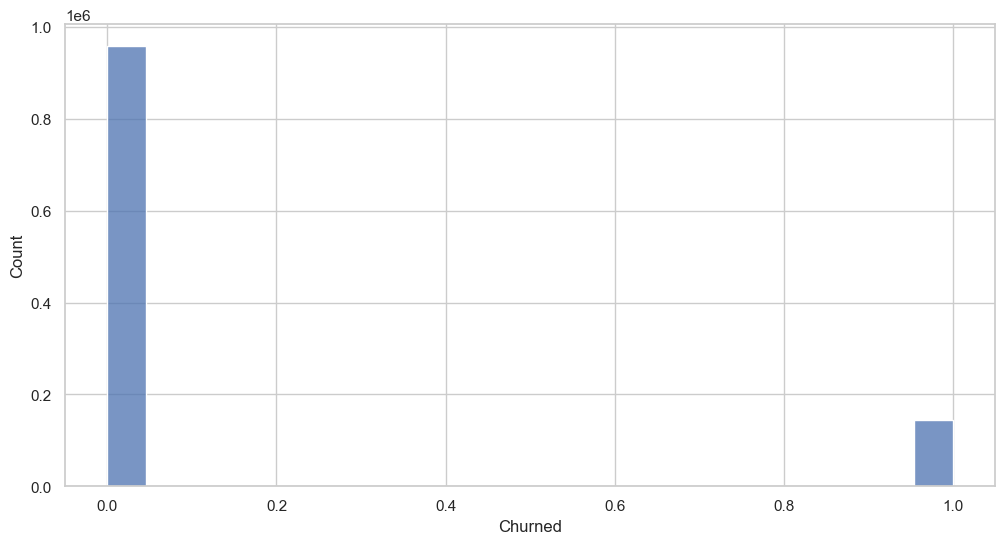

In [1213]:
sns.histplot(customer_churn_df['Churned'])
plt.show()

##### Feature Engineering

###### Insurance Income Ratio

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/2580569112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_churn_df.corr()


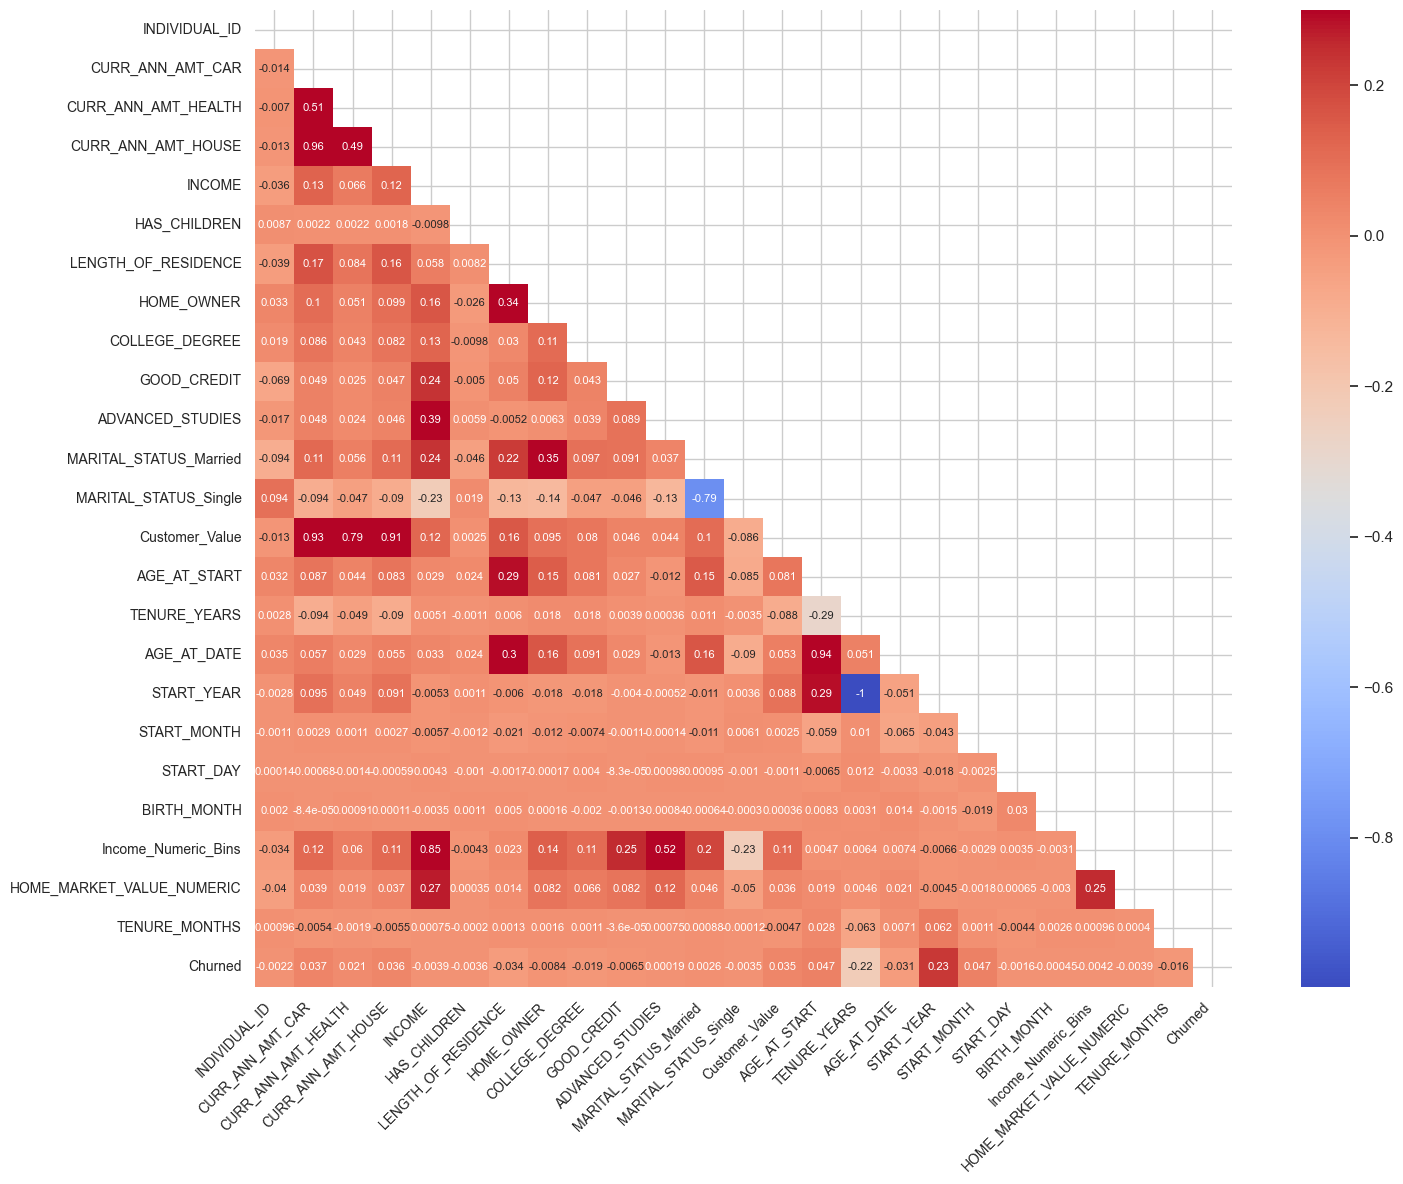

In [1173]:
corr = customer_churn_df.corr()

# Increase the figure size
plt.figure(figsize=(16, 12))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap with adjusted font size and rotated labels
sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, annot_kws={"size": 8}, cmap='coolwarm')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot with a tight layout to ensure no overlapping
plt.tight_layout()
plt.show()

In [1177]:
threshold = 0.15
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix["Customer_Value"]) > threshold].tolist()
print(highly_correlated_features)

['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'LENGTH_OF_RESIDENCE', 'Customer_Value']


In [984]:
customer_churn_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224601 entries, 0 to 1224600
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   INDIVIDUAL_ID           1224601 non-null  float64       
 1   CUST_ORIG_DATE          1103281 non-null  float64       
 2   DATE_OF_BIRTH           1103281 non-null  float64       
 3   CUST_START_DATE         1103281 non-null  float64       
 4   CURR_ANN_AMT_CAR        1103281 non-null  float64       
 5   CURR_ANN_AMT_HEALTH     1103281 non-null  float64       
 6   CURR_ANN_AMT_HOUSE      1103281 non-null  float64       
 7   INCOME                  1103281 non-null  float64       
 8   HAS_CHILDREN            1103281 non-null  float64       
 9   LENGTH_OF_RESIDENCE     1103281 non-null  float64       
 10  HOME_MARKET_VALUE       1103281 non-null  object        
 11  HOME_OWNER              1103281 non-null  float64       
 12  COLLEGE_DEGREE

In [1178]:
churn_features_df = customer_churn_df

In [1179]:
churn_features_df["HAS_CHILDREN"] = churn_features_df["HAS_CHILDREN"].dropna()

In [1180]:
churn_features_eng_df = churn_features_df

In [1181]:
churn_features_eng_df = churn_features_eng_df.drop(columns='SUSPD_DATE')

In [1183]:
churn_features_eng_df.isnull().sum()

INDIVIDUAL_ID                0
CUST_ORIG_DATE               0
DATE_OF_BIRTH                0
CUST_START_DATE              0
CURR_ANN_AMT_CAR             0
CURR_ANN_AMT_HEALTH          0
CURR_ANN_AMT_HOUSE           0
INCOME                       0
HAS_CHILDREN                 0
LENGTH_OF_RESIDENCE          0
HOME_MARKET_VALUE            0
HOME_OWNER                   0
COLLEGE_DEGREE               0
GOOD_CREDIT                  0
ADVANCED_STUDIES             0
MARITAL_STATUS_Married       0
MARITAL_STATUS_Single        0
Customer_Value               0
AGE_AT_START                 0
TENURE_YEARS                 0
AGE_AT_DATE                  0
START_YEAR                   0
START_MONTH                  0
START_DAY                    0
BIRTH_MONTH                  0
INCOME_BIN                   0
Income_Numeric_Bins          0
HOME_MARKET_VALUE_NUMERIC    0
TENURE_MONTHS                0
Churned                      0
dtype: int64

In [1022]:
churn_features_eng_df.columns

Index(['INDIVIDUAL_ID', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE',
       'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE',
       'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_MARKET_VALUE',
       'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'Customer_Value',
       'AGE_AT_START', 'TENURE_YEARS', 'START_YEAR', 'START_MONTH',
       'START_DAY', 'BIRTH_MONTH', 'Churned'],
      dtype='object')

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

Logistic Regression as Baseline Model.

In [1286]:
churn_features_df['Churned'].value_counts()

0    958035
1    145246
Name: Churned, dtype: int64

In [1288]:
churn_features_df = churn_features_df.dropna(subset=['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'INCOME', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS_Married', 'Customer_Value'])

In [1291]:
churn_features_df

,INDIVIDUAL_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,...,START_YEAR,START_MONTH,START_DAY,BIRTH_MONTH,INCOME_BIN,Income_Numeric_Bins,HOME_MARKET_VALUE_NUMERIC,TENURE_MONTHS,SUSPD_DATE,Churned
0,2.213000e+11,2018-12-09,1978-06-23,2018-12-09,1318.877997,517.999317,411,33750.000,0,15.000,...,2018,12,9,6,Very Low,0,62499.5,0,NaT,0
1,2.213001e+11,2018-01-02,1950-05-30,2018-01-02,1474.199182,558.417779,414,41250.000,1,2.000,...,2018,1,2,5,Very Low,0,62499.5,0,NaT,0
2,2.213016e+11,2022-07-25,1969-05-25,2022-07-25,1492.409561,401.517490,463,187500.000,0,6.000,...,2022,7,25,5,High,3,187499.5,0,2021-12-22,1
3,2.213016e+11,2006-10-11,1972-09-25,2006-10-11,1284.633494,772.857222,366,131250.000,1,4.000,...,2006,10,11,9,High,3,237499.5,0,NaT,0
4,2.213027e+11,2021-08-05,1990-04-20,2021-08-05,1409.916163,774.163467,408,78750.000,1,2.000,...,2021,8,5,4,Low,1,137499.5,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103276,2.213015e+11,2013-12-28,1945-07-01,2013-12-28,1104.096865,314.218724,346,131250.000,1,1.000,...,2013,12,28,7,High,3,137499.5,0,NaT,0
1103277,2.213026e+11,2013-08-08,1981-09-22,2013-08-08,1755.570597,751.803637,492,187500.000,1,12.000,...,2013,8,8,9,High,3,137499.5,0,NaT,0
1103278,2.213008e+11,2019-06-23,1970-07-26,2019-06-23,1604.105051,826.368696,485,131250.000,1,11.000,...,2019,6,23,7,High,3,87499.5,0,NaT,0
1103279,2.213004e+11,2022-07-13,1985-07-22,2022-07-13,1689.749774,870.687170,500,120558.264,1,6.801,...,2022,7,13,7,Medium,2,112499.5,0,NaT,0


In [1301]:
churn_features_df.columns

Index(['INDIVIDUAL_ID', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE',
       'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE',
       'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_MARKET_VALUE',
       'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'Customer_Value',
       'AGE_AT_START', 'TENURE_YEARS', 'AGE_AT_DATE', 'START_YEAR',
       'START_MONTH', 'START_DAY', 'BIRTH_MONTH', 'INCOME_BIN',
       'Income_Numeric_Bins', 'HOME_MARKET_VALUE_NUMERIC', 'TENURE_MONTHS',
       'SUSPD_DATE', 'Churned'],
      dtype='object')

In [1302]:
# Feature matrix
feature_excluding = ['INDIVIDUAL_ID', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'HOME_MARKET_VALUE', 'INCOME_BIN', 'SUSPD_DATE']
X_3_1 = churn_features_df[['TENURE_YEARS','MARITAL_STATUS_Single', 'Customer_Value', 'GOOD_CREDIT', 'HOME_OWNER', 'HOME_MARKET_VALUE_NUMERIC', 'Income_Numeric_Bins', 'AGE_AT_DATE', 'COLLEGE_DEGREE' ]]
y_3_1 = churn_features_df['Churned']

# Split the data into training and test sets with stratification to ensure same distribution in training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_3_1, y_3_1, test_size=0.3, random_state=42, stratify=y_3_1)

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [1304]:
churn_features_df.columns
X_3_1 = churn_features_df[['TENURE_YEARS', 'MARITAL_STATUS_Single', 'Customer_Value', 'GOOD_CREDIT', 'HOME_OWNER',
                           'HOME_MARKET_VALUE_NUMERIC', 'Income_Numeric_Bins', 'AGE_AT_DATE', 'COLLEGE_DEGREE']]
y_3_1 = churn_features_df['Churned']

# Split the data into training and test sets with stratification to ensure same distribution in training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_3_1, y_3_1, test_size=0.3, random_state=42, stratify=y_3_1)

# Initialize the Logistic Regression model with class_weight='balanced'
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions and evaluate again
#y_pred_balanced = log_reg_balanced.predict(X_test)
# Follow up with evaluation metrics and confusion matrix as before


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Accuracy: 0.6085
Precision: 0.2091
Recall: 0.7092
F1 Score: 0.3230
ROC AUC Score: 0.7059


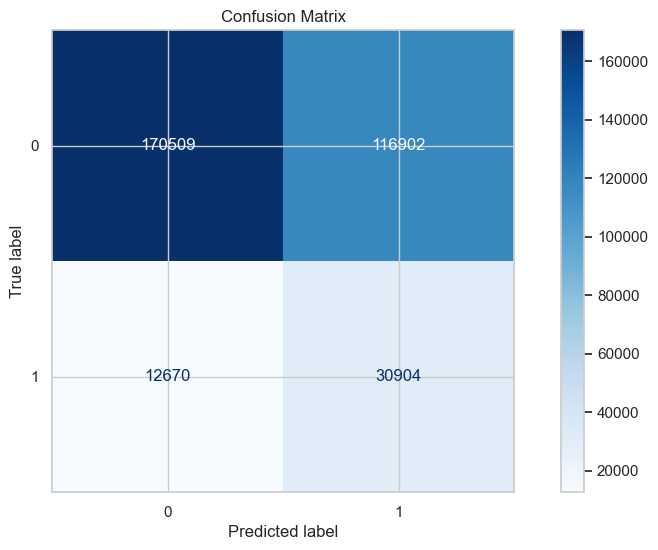

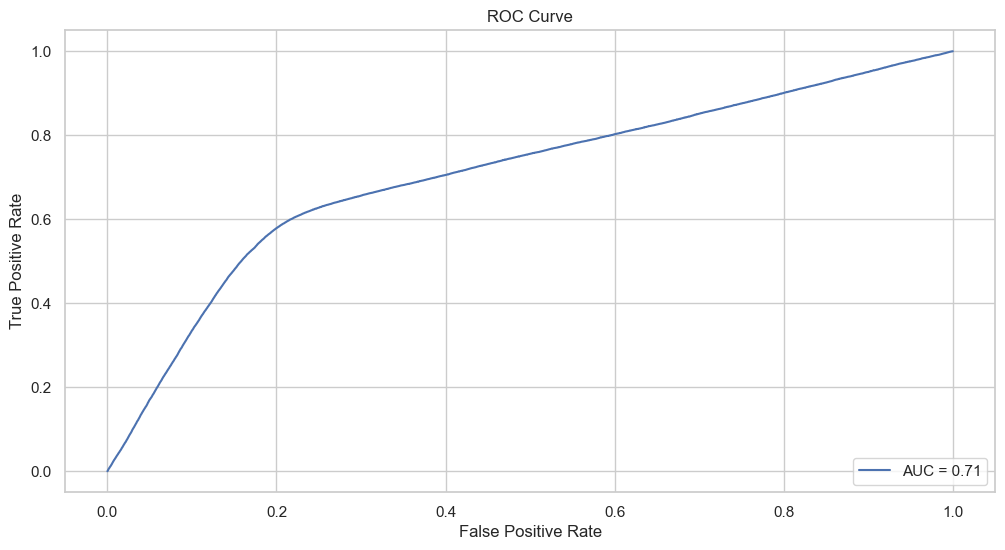

In [1305]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming customer_value_df is your DataFrame and you have correctly created X_reg_2nd and y_reg_2nd
X = X_reg_2nd
y = y_reg_2nd

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (SGD is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)


In [ ]:
# Fit the model on the scaled training data
sgd_clf.fit(X_train_scaled, y_train)


In [ ]:
# Make predictions on the scaled test set
y_pred = sgd_clf.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy or any other suitable metrics for your problem
accuracy = accuracy_score(y_test, y_pred)
print(f'SGD Classifier Accuracy: {accuracy}')


#### Q3.2 Build a second model and compare the model performance. (15 points)

In [1306]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier with log loss to simulate logistic regression
sgd_clf = SGDClassifier(loss='log', random_state=42, max_iter=1000, class_weight='balanced')


In [1307]:
# Fit the model on the training data
sgd_clf.fit(X_train, y_train)


/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(class_weight='balanced', loss='log', random_state=42)

SGD Classifier Accuracy: 0.8548
SGD Classifier Precision: 0.2425
SGD Classifier Recall: 0.0483
SGD Classifier F1 Score: 0.0806
SGD Classifier ROC AUC Score: 0.5127


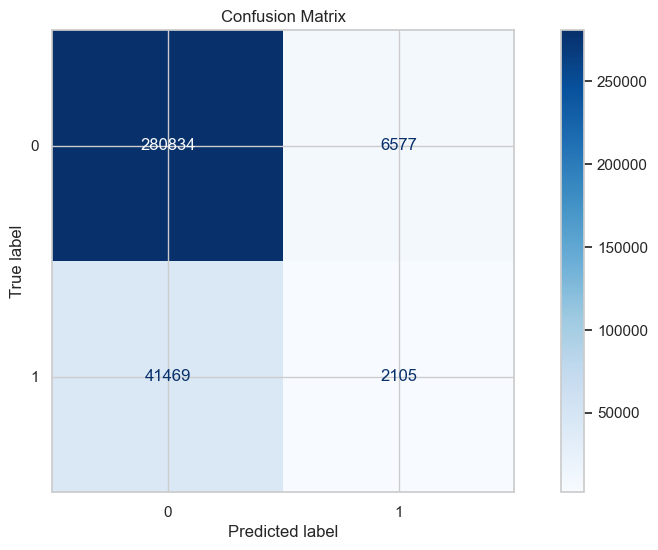

In [1309]:
# Make predictions
y_pred_sgd = sgd_clf.predict(X_test)
y_proba_sgd = sgd_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)
roc_auc_sgd = roc_auc_score(y_test, y_proba_sgd)

print(f"SGD Classifier Accuracy: {accuracy_sgd:.4f}")
print(f"SGD Classifier Precision: {precision_sgd:.4f}")
print(f"SGD Classifier Recall: {recall_sgd:.4f}")
print(f"SGD Classifier F1 Score: {f1_sgd:.4f}")
print(f"SGD Classifier ROC AUC Score: {roc_auc_sgd:.4f}")

cm = confusion_matrix(y_test, y_pred_sgd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

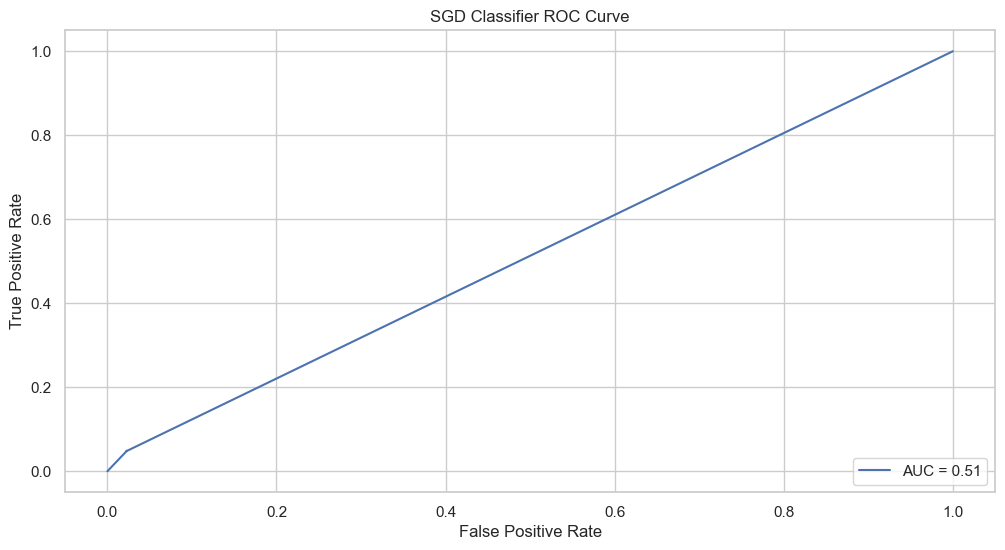

In [1310]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Calculate the ROC curve
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_proba_sgd)

# Display the ROC curve
roc_display_sgd = RocCurveDisplay(fpr=fpr_sgd, tpr=tpr_sgd, roc_auc=roc_auc_sgd)
roc_display_sgd.plot()
plt.title('SGD Classifier ROC Curve')
plt.show()


Hyperparameter Tuning of SGD Classifier to tune for accuracy.

In [1312]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier

# Adjusted parameter grid with fewer options
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'loss': ['hinge', 'log'],
    'penalty': ['l2', 'elasticnet'],
    'learning_rate': ['optimal', 'adaptive'],
    'eta0': [0.01, 0.001]  # Simplified options
}

sgd_clf = SGDClassifier(random_state=42, max_iter=1000)

# Use RandomizedSearchCV with a limited number of iterations and reduced CV folds
random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)


/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Best parameters: {'penalty': 'l2', 'loss': 'log', 'learning_rate': 'optimal', 'eta0': 0.001, 'alpha': 0.001}
Best cross-validation score: 0.8635769186943866


/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGD Classifier with Optimal Parameters - Accuracy: 0.1904
SGD Classifier with Optimal Parameters - Precision: 0.1355
SGD Classifier with Optimal Parameters - Recall: 0.9568
SGD Classifier with Optimal Parameters - F1 Score: 0.2373
SGD Classifier with Optimal Parameters - ROC AUC Score: 0.5157


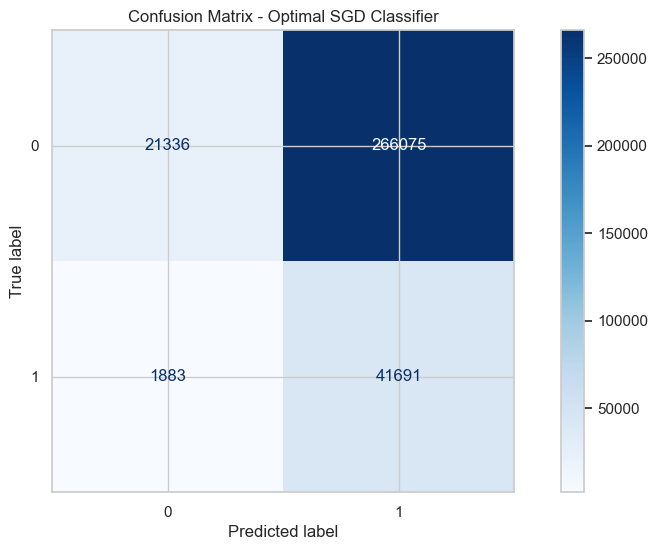

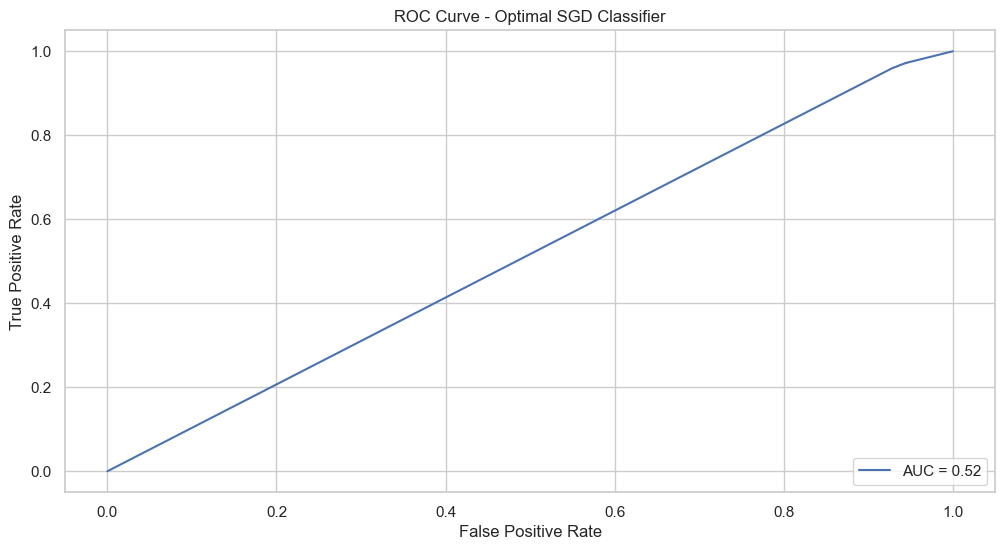

In [1313]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize the SGD Classifier with the best parameters
optimal_sgd_clf = SGDClassifier(loss='log', penalty='l2', learning_rate='optimal', eta0=0.001, alpha=0.001, random_state=42, max_iter=1000)

# Fit the model on the training data
optimal_sgd_clf.fit(X_train, y_train)

# Make predictions
y_pred_optimal = optimal_sgd_clf.predict(X_test)
y_proba_optimal = optimal_sgd_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)
roc_auc_optimal = roc_auc_score(y_test, y_proba_optimal)

print(f"SGD Classifier with Optimal Parameters - Accuracy: {accuracy_optimal:.4f}")
print(f"SGD Classifier with Optimal Parameters - Precision: {precision_optimal:.4f}")
print(f"SGD Classifier with Optimal Parameters - Recall: {recall_optimal:.4f}")
print(f"SGD Classifier with Optimal Parameters - F1 Score: {f1_optimal:.4f}")
print(f"SGD Classifier with Optimal Parameters - ROC AUC Score: {roc_auc_optimal:.4f}")

# Confusion Matrix
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal)
disp_optimal.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Optimal SGD Classifier')
plt.show()

# ROC Curve
fpr_optimal, tpr_optimal, thresholds_optimal = roc_curve(y_test, y_proba_optimal)
roc_display_optimal = RocCurveDisplay(fpr=fpr_optimal, tpr=tpr_optimal, roc_auc=roc_auc_optimal)
roc_display_optimal.plot()
plt.title('ROC Curve - Optimal SGD Classifier')
plt.show()


Tuned Hyperparameters result in worse results overall

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Suggested Model: Logistic Regression

Justification:
Balanced Performance: The Logistic Regression model shows a better balance across all evaluated metrics. While its recall is lower than the SGD Classifier's, it maintains higher accuracy, precision, and F1 score, indicating a more balanced trade-off between identifying churned customers and not misclassifying too many loyal customers as churned.

Higher Precision: Although precision is relatively low for both models, Logistic Regression's precision is higher. This means it is more reliable when it predicts a customer will churn, which can be critical for targeted intervention campaigns where resources are limited.

ROC AUC Score: The ROC AUC score for Logistic Regression is significantly higher than the SGD's, indicating a better overall ability to distinguish between the churned and not churned customers across all thresholds.

Application Scenario:
Targeted Intervention Campaigns: Use the Logistic Regression model to identify customers at a high risk of churning. Given its higher precision, marketing efforts, such as personalized offers or loyalty programs, can be more effectively directed towards these customers to prevent churn.
Customer Insight Analysis: The Logistic Regression model can also be used to analyze the influence of different features on the likelihood of churn. These insights can inform broader marketing strategies aimed at improving customer satisfaction and retention across various segments.

Most Important Metric for Churn Prediction:
The importance of metrics can vary depending on the business context and objectives. However, in churn prediction, Recall and ROC AUC Score often emerge as particularly critical metrics:

Recall (Sensitivity): High recall is important if the cost of missing a churned customer (false negative) is high. For businesses where retaining a customer is far more valuable than the cost of mistakenly targeting a loyal customer, focusing on recall makes sense. This ensures that most churned customers are identified, even at the expense of some false alarms.

ROC AUC Score: This metric provides a comprehensive view of the model's performance across all classification thresholds, offering insights into the model's ability to distinguish between the churned and not churned customers regardless of the decision cutoff. A high ROC AUC Score indicates the model's effectiveness in ranking predictions rather than its accuracy at a specific threshold.

Final Recommendation:
Given the metrics provided, Logistic Regression is recommended for the churn prediction task. It offers a balanced performance across precision, recall, and accuracy, making it suitable for identifying at-risk customers while minimizing resources wasted on false positives. The model's higher ROC AUC Score also indicates better overall discrimination ability between classes.

For the head of marketing, focusing on recall might be especially important to ensure that most customers who are at risk of churning are captured by the model, allowing for targeted interventions. However, it's also crucial to consider the cost of false positives and strive for a balance that aligns with the company's strategic objectives and resource availability.